# 1. 제공된 모든 데이터 다운로드

In [2]:
import pathlib
import random
from functools import reduce
from collections import defaultdict

import pandas as pd
import geopandas as gpd

import shapely
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib
from tqdm.notebook import tqdm

import sklearn.cluster
import tensorflow as tf
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString

from geoband import API

In [3]:
input_path = pathlib.Path('./input')
if not input_path.is_dir():
    input_path.mkdir()

In [4]:
# input이라는 폴더를 생성해 제공받은 모든 데이터 파일을 저장

API.GetCompasData('SBJ_2107_004', '1',  input_path.joinpath('1.5개시도_경찰서_관할경계.geojson'))
API.GetCompasData('SBJ_2107_004', '2',  input_path.joinpath('2.5개시도_치안안전센터_관할경계.geojson'))
API.GetCompasData('SBJ_2107_004', '3',  input_path.joinpath('3.체감안전도_설문지.txt'))
API.GetCompasData('SBJ_2107_004', '4',  input_path.joinpath('4.체감안전도_통계(2017~2019).csv'))
API.GetCompasData('SBJ_2107_004', '5',  input_path.joinpath('5.112신고.csv'))
API.GetCompasData('SBJ_2107_004', '6', input_path.joinpath('6.범죄발생원표.csv'))
API.GetCompasData('SBJ_2107_004', '7', input_path.joinpath('7.범죄검거원표.csv'))
API.GetCompasData('SBJ_2107_004', '8', input_path.joinpath('8.범죄피의자원표.csv'))
API.GetCompasData('SBJ_2107_004', '9', input_path.joinpath('9.5개시도_보안등현황.csv'))
API.GetCompasData('SBJ_2107_004', '10', input_path.joinpath('10.5개시도_CCTV설치현황.csv'))
API.GetCompasData('SBJ_2107_004', '11', input_path.joinpath('11.5개시도_교통사고현황.csv'))  #교통사고 안전도에 필수적
API.GetCompasData('SBJ_2107_004', '12', input_path.joinpath('12.경찰서별_지구대별_인원현황.csv'))
API.GetCompasData('SBJ_2107_004', '13', input_path.joinpath('13.5개시도_화재발생통계.csv'))
API.GetCompasData('SBJ_2107_004', '14', input_path.joinpath('14.5개시도_성연령별_총인구분포.csv'))
API.GetCompasData('SBJ_2107_004', '15', input_path.joinpath('15.5개시도_1인가구수.csv'))
API.GetCompasData('SBJ_2107_004', '16', input_path.joinpath('16.5개시도_인구데이터(외국인).csv'))
API.GetCompasData('SBJ_2107_004', '17', input_path.joinpath('17.5개시도_기초수급자현황.csv'))  
API.GetCompasData('SBJ_2107_004', '18', input_path.joinpath('18.5개시도_자살율.csv'))
API.GetCompasData('SBJ_2107_004', '19', input_path.joinpath('19.5개시도_최종학력통계.csv'))
API.GetCompasData('SBJ_2107_004', '20', input_path.joinpath('20.5개시도_공원현황.csv'))
API.GetCompasData('SBJ_2107_004', '21', input_path.joinpath('21.5개시도_유흥업소_단란주점현황.csv'))
API.GetCompasData('SBJ_2107_004', '22', input_path.joinpath('22.5개시도_비상벨현황.geojson'))
API.GetCompasData('SBJ_2107_004', '23', input_path.joinpath('23.5개시도_종관관측기상(2017~2020).csv'))
API.GetCompasData('SBJ_2107_004', '24', input_path.joinpath('24.5개시도_도로명주소(건물).geojson'))
API.GetCompasData('SBJ_2107_004', '25', input_path.joinpath('25.결과제출양식.csv'))
API.GetCompasData('SBJ_2107_004', '26', input_path.joinpath('26.코드정의서.xlsx'))
API.GetCompasData('SBJ_2107_004', '27', input_path.joinpath('27.5개시도_설문결과데이터(2017~2018).csv'))

for path in list(input_path.glob('*.csv')) + list(input_path.glob('*.geojson')):
    print(path)

input/동대문_cctv설치.csv
input/서울특별시_강동구_CCTV_20200911_1600136294390_157488.csv
input/동대문_보안등.csv
input/서울특별시_송파구_보안등정보_20210225_1614748045897_1117425.csv
input/서울특별시_도봉구_안전비상벨위치_20190626.csv
input/서울특별시_양천구_보안등정보_20210624_1624599558550_558983.csv
input/화재발생건수.csv
input/4.체감안전도_통계(2017~2019).csv
input/5.112신고.csv
input/6.범죄발생원표.csv
input/7.범죄검거원표.csv
input/8.범죄피의자원표.csv
input/9.5개시도_보안등현황.csv
input/10.5개시도_CCTV설치현황.csv
input/11.5개시도_교통사고현황.csv
input/12.경찰서별_지구대별_인원현황.csv
input/13.5개시도_화재발생통계.csv
input/14.5개시도_성연령별_총인구분포.csv
input/15.5개시도_1인가구수.csv
input/16.5개시도_인구데이터(외국인).csv
input/17.5개시도_기초수급자현황.csv
input/18.5개시도_자살율.csv
input/19.5개시도_최종학력통계.csv
input/20.5개시도_공원현황.csv
input/21.5개시도_유흥업소_단란주점현황.csv
input/23.5개시도_종관관측기상(2017~2020).csv
input/25.결과제출양식.csv
input/27.5개시도_설문결과데이터(2017~2018).csv
input/1.5개시도_경찰서_관할경계.geojson
input/2.5개시도_치안안전센터_관할경계.geojson
input/22.5개시도_비상벨현황.geojson
input/24.5개시도_도로명주소(건물).geojson


# 2. y_set 생성 (4번 데이터)

In [5]:
# 사용할 데이터 불러오기
d4=pd.read_csv("input/4.체감안전도_통계(2017~2019).csv")
d4.head()

,large_category,medium_category,tot_f_safety,dept_safety,crime_safety,rob_satety_q1,mur_safety_q2,ta_safety_q3,raw_odder_q4,overall_q5
0,2017 상반기(연령대),10대(만14세 이상),74.3,73.3,81.5,80.1,82.8,70.9,66.9,76.5
1,2017 상반기(연령대),20대,70.1,69.3,76.9,75.7,78.2,66.1,64.3,71.7
2,2017 상반기(연령대),30대,69.6,68.9,76.8,75.7,77.9,63.9,65.2,71.1
3,2017 상반기(연령대),40대,70.7,70.2,77.2,76.1,78.3,65.5,67.0,71.9
4,2017 상반기(연령대),50대,72.1,71.5,78.3,77.7,79.0,68.0,67.6,73.3


In [6]:
# 2019 하반기 세종서로 되어있는 부분을 다른 데이터와 통일시키기 위해 충남세종서로 정정
d4.loc[d4['medium_category']=='세종서','medium_category'] = '충남세종서' 

# 2017 상반기 데이터의 경우 표기만 다르고 순서가 2018 상반기와 같음을 확인해 해당 순서로 바꿔줌
b = d4[d4['large_category']=="2018 상반기(경찰서별)"]['medium_category'].unique()
d4.loc[d4['large_category']=='2017 상반기(경찰서별)','medium_category']=b
# 2017 하반기 데이터도 마찬가지이므로 같은 방식을 적용
d4.loc[d4['large_category']=='2017 하반기(경찰서별)','medium_category']=b

In [7]:
y_set = d4
y_set['year'] = y_set['large_category'].apply(lambda x : x[0:4])
y_set['half'] = y_set['large_category'].apply(lambda x : x[5:8])
y_set['big_cat'] = y_set['large_category'].apply(lambda x : x[8:])
y_set = y_set.drop('large_category', axis=1)

y_set = y_set[y_set['big_cat']=='(경찰서별)']
y_set = y_set.drop('big_cat', axis=1)

y_set = y_set[[ 'medium_category', 'year', 'half','tot_f_safety', 'dept_safety', 'crime_safety',
       ' rob_satety_q1', 'mur_safety_q2', 'ta_safety_q3', 'raw_odder_q4',
       'overall_q5']]

y_set['half'].replace(['상반기','하반기'],[1,2], inplace=True)
y_set['half'].unique()

y_set = y_set.reset_index(drop=True)

In [8]:
import itertools
def expandgrid(*itrs):
   product = list(itertools.product(*itrs))
   return {'Var{}'.format(i+1):[x[i] for x in product] for i in range(len(itrs))}

a=[2017, 2018, 2019]
y_set2=pd.DataFrame(expandgrid(a, b))
y_set2.columns=['year', 'name']

col = y_set.columns[3:]
# 상반기 하반기 데이터를 각각 저장
half1 = y_set[y_set['half']==1]
half2 = y_set[y_set['half']==2]

# 상반기 하반기 평균을 이용해 연도별 y값을 생성해 사용
for colname in col :
    a = pd.DataFrame()
    a['half1'] = half1[colname].values
    a['half2'] = half2[colname].values
    y_set2[colname] = a.mean(axis=1)

y_set2

,year,name,tot_f_safety,dept_safety,crime_safety,rob_satety_q1,mur_safety_q2,ta_safety_q3,raw_odder_q4,overall_q5
0,2017,서울중부서,72.50,71.90,77.40,76.85,77.85,70.60,67.15,73.90
1,2017,서울종로서,71.60,71.05,79.95,79.05,80.85,69.50,62.80,73.00
2,2017,서울남대문서,69.25,68.90,76.95,76.35,77.50,68.95,60.15,70.15
3,2017,서울서대문서,72.45,71.95,78.95,78.05,79.80,68.75,67.55,73.60
4,2017,서울혜화서,72.55,71.65,79.30,78.30,80.30,69.90,65.10,74.75
...,...,...,...,...,...,...,...,...,...,...
118,2019,경남창원서부서,74.45,73.95,79.45,78.55,80.35,70.00,71.90,75.65
119,2019,경남마산중부서,74.80,74.55,80.30,80.30,80.25,70.15,72.80,75.30
120,2019,경남마산동부서,71.80,71.40,76.50,75.55,77.35,67.90,69.40,72.75
121,2019,경남진주서,74.30,73.80,78.00,77.30,78.60,69.35,73.50,75.45


In [9]:
# 연도별 y_set파일 내보내기
y_set2.to_csv("y_set_year.csv")

# 3. 인구 관련 변수 생성

In [10]:
q1=gpd.read_file(input_path.joinpath('1.5개시도_경찰서_관할경계.geojson'))
q12=pd.read_csv(input_path.joinpath('12.경찰서별_지구대별_인원현황.csv'))
q14=pd.read_csv(input_path.joinpath('14.5개시도_성연령별_총인구분포.csv'))
q15=pd.read_csv(input_path.joinpath('15.5개시도_1인가구수.csv'))

# 12번 데이터

In [11]:
q12

,nat_pol_agency,pol_office,sec_center,num
0,서울경찰청,서울중부경찰서,을지지구대,42
1,서울경찰청,서울중부경찰서,광희지구대,47
2,서울경찰청,서울중부경찰서,약수지구대,42
3,서울경찰청,서울중부경찰서,신당파출소,26
4,서울경찰청,서울중부경찰서,장충파출소,26
...,...,...,...,...
315,경남경찰청,진주경찰서,일반성파출소,13
316,경남경찰청,진주경찰서,지수파출소,9
317,경남경찰청,진주경찰서,수곡파출소,9
318,경남경찰청,진주경찰서,대곡파출소,9


In [12]:
q12['pol_office'].unique()
# '서울일지경찰서','서울척지경찰서', '서울봉지경찰서', '서울류지경찰서', '서울왕파경찰서', '서울로3경찰서', '서울리봉경찰서'

array(['서울중부경찰서', '서울종로경찰서', '서울남대문경찰서', '서울서대문경찰서', '서울혜화경찰서', '서울용산경찰서',
       '서울성북경찰서', '서울동대문경찰서', '서울마포경찰서', '서울영등포경찰서', '서울성동경찰서', '서울동작경찰서',
       '서울광진경찰서', '서울서부경찰서', '서울강북경찰서', '서울금천경찰서', '서울중랑경찰서', '서울강남경찰서',
       '서울관악경찰서', '서울강서경찰서', '서울강동경찰서', '서울종암경찰서', '서울구로경찰서', '서울일지경찰서',
       '서울척지경찰서', '서울봉지경찰서', '서울류지경찰서', '서울왕파경찰서', '서울로3경찰서', '서울리봉경찰서',
       '서울서초경찰서', '서울양천경찰서', '서울송파경찰서', '서울노원경찰서', '서울방배경찰서', '서울은평경찰서',
       '서울도봉경찰서', '서울수서경찰서', '세종경찰서', '수원중부경찰서', '수원남부경찰서', '수원서부경찰서',
       '창원중부경찰서', '창원서부경찰서', '마산중부경찰서', '마산동부경찰서', '진해경찰서', '진주경찰서'],
      dtype=object)

In [13]:
rej_pol = ['서울일지경찰서','서울척지경찰서', '서울봉지경찰서', '서울류지경찰서', '서울왕파경찰서', '서울로3경찰서', '서울리봉경찰서']
for i in rej_pol:
    print(i)

서울일지경찰서
서울척지경찰서
서울봉지경찰서
서울류지경찰서
서울왕파경찰서
서울로3경찰서
서울리봉경찰서


In [14]:
q12['pol_office'].value_counts()

진주경찰서       13
서울종로경찰서     13
서울동대문경찰서    11
서울송파경찰서     11
서울영등포경찰서    10
서울광진경찰서     10
서울강서경찰서     10
세종경찰서        9
서울강북경찰서      9
수원남부경찰서      9
서울강동경찰서      9
서울성동경찰서      9
서울관악경찰서      9
서울양천경찰서      8
마산중부경찰서      8
서울중랑경찰서      8
서울노원경찰서      8
서울서대문경찰서     8
서울도봉경찰서      8
서울혜화경찰서      8
서울강남경찰서      8
서울마포경찰서      8
마산동부경찰서      7
수원중부경찰서      7
서울서초경찰서      7
서울동작경찰서      7
수원서부경찰서      7
서울중부경찰서      7
서울남대문경찰서     7
서울용산경찰서      7
서울성북경찰서      6
서울수서경찰서      6
창원서부경찰서      6
창원중부경찰서      6
진해경찰서        6
서울서부경찰서      5
서울금천경찰서      5
서울은평경찰서      4
서울종암경찰서      4
서울방배경찰서      4
서울리봉경찰서      1
서울로3경찰서      1
서울봉지경찰서      1
서울왕파경찰서      1
서울류지경찰서      1
서울일지경찰서      1
서울구로경찰서      1
서울척지경찰서      1
Name: pol_office, dtype: int64

In [15]:
pli = []

for i in rej_pol:
    pli.append(q12[q12['pol_office'] == i].index)

In [16]:
import itertools
idx =list(itertools.chain(*pli))

In [17]:
qq12 = q12.drop(idx).reset_index(drop=True)
qq12

,nat_pol_agency,pol_office,sec_center,num
0,서울경찰청,서울중부경찰서,을지지구대,42
1,서울경찰청,서울중부경찰서,광희지구대,47
2,서울경찰청,서울중부경찰서,약수지구대,42
3,서울경찰청,서울중부경찰서,신당파출소,26
4,서울경찰청,서울중부경찰서,장충파출소,26
...,...,...,...,...
308,경남경찰청,진주경찰서,일반성파출소,13
309,경남경찰청,진주경찰서,지수파출소,9
310,경남경찰청,진주경찰서,수곡파출소,9
311,경남경찰청,진주경찰서,대곡파출소,9


In [18]:
polis_num=qq12.groupby('pol_office',as_index=False).sum()
polis_num.columns=['name', 'polis_num']
polis_num

,name,polis_num
0,마산동부경찰서,185
1,마산중부경찰서,142
2,서울강남경찰서,421
3,서울강동경찰서,393
4,서울강북경찰서,347
5,서울강서경찰서,500
6,서울관악경찰서,493
7,서울광진경찰서,380
8,서울구로경찰서,69
9,서울금천경찰서,274


# 14번 데이터

In [19]:
q14

,sido,sgg_nm,age,date,popu_num,popu_male_num,popu_female_num,popu_sx_rate,local_num,local_male_num,local_female_num,local_sx_rate
0,서울특별시,종로구,합계,2017,157277,76670,80607,95.1,146298,71757,74541,96.3
1,서울특별시,종로구,0~4세,2017,4137,2099,2038,103.0,4011,2039,1972,103.4
2,서울특별시,종로구,0세,2017,694,336,358,93.9,675,327,348,94.0
3,서울특별시,종로구,1세,2017,836,429,407,105.4,805,412,393,104.8
4,서울특별시,종로구,2세,2017,878,459,419,109.5,850,447,403,110.9
...,...,...,...,...,...,...,...,...,...,...,...,...
13819,서울특별시,중구,15세미만,2017,11035,5604,5431,103.2,10565,5334,5231,102.0
13820,서울특별시,중구,15~64세,2017,97649,48332,49317,98.0,88374,44025,44349,99.3
13821,서울특별시,중구,65세이상,2017,19212,8259,10953,75.4,18692,8032,10660,75.3
13822,서울특별시,중구,평균연령,2017,42.8,42.1,43.5,NaN,43.2,42.4,43.9,NaN


In [20]:
q14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13824 entries, 0 to 13823
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sido              13824 non-null  object 
 1   sgg_nm            13824 non-null  object 
 2   age               13824 non-null  object 
 3   date              13824 non-null  int64  
 4   popu_num          13824 non-null  object 
 5   popu_male_num     13824 non-null  object 
 6   popu_female_num   13824 non-null  object 
 7   popu_sx_rate      13607 non-null  float64
 8   local_num         13824 non-null  object 
 9   local_male_num    13824 non-null  object 
 10  local_female_num  13824 non-null  object 
 11  local_sx_rate     13607 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.3+ MB


In [21]:
q14=q14.drop(['sido', 'popu_sx_rate','local_sx_rate','local_male_num','local_female_num'], axis=1)
q14.rename(columns  = {'date': 'year'}, inplace = True)
q14['sgg_nm']=q14.sgg_nm.replace('수원시','', regex=True).replace('창원시','', regex=True).replace('세종시', '세종특별자치시', )

In [22]:
q14['age'].unique()
#지역구별 인구수

array(['합계', '0~4세', '0세', '1세', '2세', '3세', '4세', '5~9세', '5세', '6세',
       '7세', '8세', '9세', '10~14세', '10세', '11세', '12세', '13세', '14세',
       '15~19세', '15세', '16세', '17세', '18세', '19세', '20~24세', '20세',
       '21세', '22세', '23세', '24세', '25~29세', '25세', '26세', '27세', '28세',
       '29세', '30~34세', '30세', '31세', '32세', '33세', '34세', '35~39세',
       '35세', '36세', '37세', '38세', '39세', '40~44세', '40세', '41세', '42세',
       '43세', '44세', '45~49세', '45세', '46세', '47세', '48세', '49세',
       '50~54세', '50세', '51세', '52세', '53세', '54세', '55~59세', '55세',
       '56세', '57세', '58세', '59세', '60~64세', '60세', '61세', '62세', '63세',
       '64세', '65~69세', '65세', '66세', '67세', '68세', '69세', '70~74세',
       '70세', '71세', '72세', '73세', '74세', '75~79세', '75세', '76세', '77세',
       '78세', '79세', '80~84세', '80세', '81세', '82세', '83세', '84세', '85세이상',
       '85~89세', '85세', '86세', '87세', '88세', '89세', '90~94세', '90세',
       '91세', '92세', '93세', '94세', '95~99세', '95세', '96세', '97세', '98세',
       '

In [23]:
q14['sgg_nm'].unique()

array(['종로구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
       '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구',
       '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', '세종특별자치시', '장안구', '권선구',
       '팔달구', '영통구', '진주시', '의창구', '성산구', '마산합포구', '마산회원구', '진해구', '중구'],
      dtype=object)

In [24]:
#지역구별 나이별 인구수 
q14_child=q14[q14['age']=='15세미만']
q14_adult=q14[q14['age']=='15~64세']
q14_elder=q14[q14['age']=='65세이상']

q14_child=q14_child.drop(['age'], axis=1)
q14_adult=q14_adult.drop(['age'], axis=1)
q14_elder=q14_elder.drop(['age'], axis=1)

q14_child[['popu_num','local_num', 'popu_male_num', 'popu_female_num']]=q14_child[['popu_num','local_num', 'popu_male_num', 'popu_female_num']].apply(pd.to_numeric)
q14_adult[['popu_num','local_num', 'popu_male_num', 'popu_female_num']]=q14_adult[['popu_num','local_num', 'popu_male_num', 'popu_female_num']].apply(pd.to_numeric)
q14_elder[['popu_num','local_num', 'popu_male_num', 'popu_female_num']]=q14_elder[['popu_num','local_num', 'popu_male_num', 'popu_female_num']].apply(pd.to_numeric)

In [25]:
q14_child['foreigner_num']=q14_child['popu_num']- q14_child['local_num']
q14_child=q14_child.reset_index(drop=True)

q14_adult['foreigner_num']=q14_adult['popu_num']- q14_adult['local_num']
q14_adult=q14_adult.reset_index(drop=True)

q14_elder['foreigner_num']=q14_elder['popu_num']- q14_elder['local_num']
q14_elder=q14_elder.reset_index(drop=True)

In [26]:
q14_vulnerable=q14_child[['popu_num','local_num','popu_male_num','popu_female_num','foreigner_num']]+q14_elder[['popu_num','local_num','popu_male_num','popu_female_num','foreigner_num']]
q14_vulnerable=pd.concat([q14_child[['sgg_nm','year']], q14_vulnerable], axis=1)
q14_vulnerable

,sgg_nm,year,popu_num,local_num,popu_male_num,popu_female_num,foreigner_num
0,종로구,2017,37407,36721,17299,20108,686
1,용산구,2017,55771,53344,25652,30119,2427
2,성동구,2017,72064,71252,33618,38446,812
3,광진구,2017,79115,77541,37851,41264,1574
4,동대문구,2017,87884,86862,41310,46574,1022
...,...,...,...,...,...,...,...
103,성산구,2019,45079,44859,22438,22641,220
104,마산합포구,2019,54500,54373,24984,29516,127
105,마산회원구,2019,54155,54015,25727,28428,140
106,진해구,2019,56927,56625,27312,29615,302


In [27]:
#지역구별 연도별 전체 인구수 
q14_sum=q14[q14['age']=='합계']
q14_sum=q14_sum.drop(['age'], axis=1)

q14_sum[['popu_num','local_num', 'popu_male_num', 'popu_female_num']]=q14_sum[['popu_num','local_num', 'popu_male_num', 'popu_female_num']].apply(pd.to_numeric)
# qq14[['popu_num','local_num', 'local_male_num', 'local_female_num']]
# qq14.loc[:,('popu_num','local_num', 'local_male_num', 'local_female_num')]

q14_sum['foreigner_num']=q14_sum['popu_num']- q14_sum['local_num']
q14_sum=q14_sum.reset_index(drop=True)
q14_sum

,sgg_nm,year,popu_num,popu_male_num,popu_female_num,local_num,foreigner_num
0,종로구,2017,157277,76670,80607,146298,10979
1,용산구,2017,223898,108471,115427,207893,16005
2,성동구,2017,302367,149060,153307,291931,10436
3,광진구,2017,363934,177156,186778,345535,18399
4,동대문구,2017,357380,176460,180920,339438,17942
...,...,...,...,...,...,...,...
103,성산구,2019,219951,114488,105463,214760,5191
104,마산합포구,2019,177579,88712,88867,174434,3145
105,마산회원구,2019,192446,96351,96095,189575,2871
106,진해구,2019,190885,98087,92798,185968,4917


In [28]:
import itertools
def expandgrid(*itrs):
   product = list(itertools.product(*itrs))
   return {'Var{}'.format(i+1):[x[i] for x in product] for i in range(len(itrs))}

In [29]:
a=[2017, 2018, 2019]
b=q1['NAME'].unique()
ab=pd.DataFrame(expandgrid(a, b))
ab.columns=['year', 'name']
ab

,year,name
0,2017,세종경찰서
1,2017,진주경찰서
2,2017,창원서부경찰서
3,2017,창원중부경찰서
4,2017,마산동부경찰서
...,...,...
118,2019,서울영등포경찰서
119,2019,서울도봉경찰서
120,2019,서울은평경찰서
121,2019,서울강북경찰서


In [30]:


def change(data_set, fire_data, col_name, do_name):
    for i in list(data_set.year.unique()): 
        #종로구 -> 종로경찰서, 혜화경찰서 
        data_set.loc[(data_set['name']=='서울혜화경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='종로구')&(fire_data['year']==i),do_name].values[0]/2
        data_set.loc[(data_set['name']=='서울종로경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='종로구')&(fire_data['year']==i),do_name].values[0]/2
        
        #중구 -> 중부경찰서, 남대문경찰서
        data_set.loc[(data_set['name']=='서울중부경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='중구')&(fire_data['year']==i),do_name].values[0]/2
        data_set.loc[(data_set['name']=='서울남대문경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='중구')&(fire_data['year']==i),do_name].values[0]/2
        
        #성북구 -> 종암경찰서, 성북경찰서
        data_set.loc[(data_set['name']=='서울종암경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='성북구')&(fire_data['year']==i),do_name].values[0]/2
        data_set.loc[(data_set['name']=='서울성북경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='성북구')&(fire_data['year']==i),do_name].values[0]/2
        
        #은평구 -> 은평경찰서, 서부경찰서
        data_set.loc[(data_set['name']=='서울은평경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='은평구')&(fire_data['year']==i),do_name].values[0]/2
        data_set.loc[(data_set['name']=='서울서부경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='은평구')&(fire_data['year']==i),do_name].values[0]/2
        
        #서초구 -> 서초경찰서, 방배경찰서
        data_set.loc[(data_set['name']=='서울서초경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='서초구')&(fire_data['year']==i),do_name].values[0]/2
        data_set.loc[(data_set['name']=='서울방배경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='서초구')&(fire_data['year']==i),do_name].values[0]/2
        
        #강남구 -> 강남경찰서, 수서경찰서
        data_set.loc[(data_set['name']=='서울강남경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='강남구')&(fire_data['year']==i),do_name].values[0]/2
        data_set.loc[(data_set['name']=='서울수서경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='강남구')&(fire_data['year']==i),do_name].values[0]/2
        
        
        
        #수원중부경찰서 <- 장안구 전체, 영통구 일부, 팔달구 일부 
        data_set.loc[(data_set['name']=='수원중부경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='장안구')&(fire_data['year']==i),do_name].values[0] + fire_data.loc[(fire_data['sgg_nm']=='팔달구')&(fire_data['year']==i),do_name].values[0]/3
        
        #수원남부경찰서 <- 권선구, 영통구, 팔달구 일부 
        data_set.loc[(data_set['name']=='수원남부경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='권선구')&(fire_data['year']==i),do_name].values[0]/3 + fire_data.loc[(fire_data['sgg_nm']=='영통구')&(fire_data['year']==i),do_name].values[0] +  fire_data.loc[(fire_data['sgg_nm']=='팔달구')&(fire_data['year']==i),do_name].values[0]/3
        
        # 수원서부경찰서 <- 권선구, 팔달구 일부
        data_set.loc[(data_set['name']=='수원서부경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='권선구')&(fire_data['year']==i),do_name].values[0]*2/3 + fire_data.loc[(fire_data['sgg_nm']=='팔달구')&(fire_data['year']==i),do_name].values[0]/3
        
        
        
        #마산동부경찰서 <- 합포구, 회원구 일부 
        data_set.loc[(data_set['name']=='마산동부경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='마산회원구')&(fire_data['year']==i),do_name].values[0]
        
        #마산중부경찰서 <- 합포구 일부 
        data_set.loc[(data_set['name']=='마산중부경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='마산합포구')&(fire_data['year']==i),do_name].values[0]
        
        
        
        #창원서부경찰서 <- 의창구 일부
        data_set.loc[(data_set['name']=='창원서부경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='의창구')&(fire_data['year']==i),do_name].values[0]/2
        
        #창원중부경찰서 <- 의창구 일부, 성산구 전체 
        data_set.loc[(data_set['name']=='창원중부경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='의창구')&(fire_data['year']==i),do_name].values[0]/2 + fire_data.loc[(fire_data['sgg_nm']=='성산구')&(fire_data['year']==i),do_name].values[0]
        
        
        
        data_set.loc[(data_set['name']=='서울용산경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='용산구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['name']=='서울성동경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='성동구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['name']=='서울광진경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='광진구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['name']=='서울동대문경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='동대문구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['name']=='서울중랑경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='중랑구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['name']=='서울강북경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='강북구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['name']=='서울도봉경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='도봉구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['name']=='서울노원경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='노원구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['name']=='서울서대문경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='서대문구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['name']=='서울마포경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='마포구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['name']=='서울구로경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='구로구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['name']=='서울금천경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='금천구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['name']=='서울영등포경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='영등포구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['name']=='서울동작경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='동작구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['name']=='서울관악경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='관악구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['name']=='서울송파경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='송파구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['name']=='서울강동경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='강동구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['name']=='서울양천경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='양천구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['name']=='서울강서경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='강서구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['name']=='세종경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='세종특별자치시')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['name']=='진주경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='진주시')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['name']=='진해경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='진해구')&(fire_data['year']==i),do_name].values[0]
    return data_set




In [31]:
data_set = change(ab, q14_sum, 'popu_num', 'popu_num')  #총인구수
data_set = change(ab, q14_sum, 'local_num', 'local_num') #내국인
data_set = change(ab, q14_sum, 'popu_male_num', 'popu_male_num') #내국인-남자(local_male_num)
data_set = change(ab, q14_sum, 'popu_female_num', 'popu_female_num') #내국인-여자(local_female_num)
data_set = change(ab, q14_sum, 'foreigner_num', 'foreigner_num') #외국인(foreigner_num)
data_set = change(ab, q14_vulnerable, 'vulner_popu_num', 'popu_num') #취약계층_총인구수(vulner_popu_num)
data_set = change(ab, q14_adult, 'active_popu_num', 'popu_num') #경제활동_총인구수(ecoactive_popu_num)

data_set

,year,name,popu_num,local_num,popu_male_num,popu_female_num,foreigner_num,vulner_popu_num,active_popu_num
0,2017,세종경찰서,276589.0,271299.0,139347.0,137242.0,5290.0,81129.0,195460.0
1,2017,진주경찰서,353209.0,347571.0,176672.0,176537.0,5638.0,98325.0,254884.0
2,2017,창원서부경찰서,125280.0,122863.0,64090.5,61189.5,2417.0,29035.5,96244.5
3,2017,창원중부경찰서,352006.0,344652.0,182329.5,169676.5,7354.0,74737.5,277268.5
4,2017,마산동부경찰서,202864.0,200094.0,101910.0,100954.0,2770.0,54363.0,148501.0
...,...,...,...,...,...,...,...,...,...
118,2019,서울영등포경찰서,394083.0,345903.0,196903.0,197180.0,48180.0,94996.0,299087.0
119,2019,서울도봉경찰서,323543.0,320223.0,156961.0,166582.0,3320.0,88542.0,235001.0
120,2019,서울은평경찰서,230765.0,227570.0,111038.0,119727.0,3195.0,62712.0,168053.0
121,2019,서울강북경찰서,303871.0,298525.0,147112.0,156759.0,5346.0,84901.0,218970.0


# 15번 데이터

In [32]:
q15
#지역구별 1인가구수 
#경찰서별 인구수를 확인 불가능 지역별로 본다면 특성이 사라짐.

,sido,sgg_nm,sx,age,date,single_person_hh,house_total_num,detached_house,apartment,townhouse,multiplex_house,house_in_commercial,not_in_house
0,서울특별시,종로구,계,합계,2017,23638,19260,11234,2992,887,3279,868,4378
1,서울특별시,종로구,계,20세 미만,2017,507,459,379,11,11,38,20,48
2,서울특별시,종로구,계,20~24,2017,2992,2519,1773,158,44,340,204,473
3,서울특별시,종로구,계,25~29,2017,3627,2845,1677,398,77,552,141,782
4,서울특별시,종로구,계,30~34,2017,2552,1970,1024,357,64,449,76,582
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5179,서울특별시,광진구,여자,65~69,2019,1401,1371,837,202,39,257,36,30
5180,서울특별시,광진구,여자,70~74,2019,1300,1268,783,164,35,254,32,32
5181,서울특별시,광진구,여자,75~79,2019,1221,1182,740,175,44,197,26,39
5182,서울특별시,광진구,여자,80~84,2019,849,802,471,170,20,122,19,47


In [33]:
q15.isnull().sum()

sido                   0
sgg_nm                 0
sx                     0
age                    0
date                   0
single_person_hh       0
house_total_num        0
detached_house         0
apartment              0
townhouse              0
multiplex_house        0
house_in_commercial    0
not_in_house           0
dtype: int64

In [34]:
q15=q15.drop(['sido','house_total_num', 'detached_house', 'apartment', 'townhouse','multiplex_house', 'house_in_commercial', 'not_in_house'], axis=1)
q15.rename(columns  = {'date': 'year'}, inplace = True)
q15['sgg_nm']=q15.sgg_nm.replace('수원시','', regex=True).replace('창원시','', regex=True).replace('세종시', '세종특별자치시', )

In [35]:
#지역구별 연도별 1인가구수
# q15[(q15['sx']=='계')&(q15['age']=='합계')]
q15_sum=q15.loc[(q15['sx']=='계')&(q15['age']=='합계'),]
q15_sum

,sgg_nm,sx,age,year,single_person_hh
0,종로구,계,합계,2017,23638
48,중구,계,합계,2017,20164
96,용산구,계,합계,2017,33076
144,성동구,계,합계,2017,39067
192,광진구,계,합계,2017,54866
...,...,...,...,...,...
4944,마산합포구,계,합계,2019,23383
4992,마산회원구,계,합계,2019,20331
5040,진해구,계,합계,2019,20962
5088,광진구,계,합계,2018,56337


In [36]:
#지역구별 연도별 1인가구수-남자
# q15[(q15['sx']=='남자')&(q15['age']=='합계')]
q15_male=q15.loc[(q15['sx']=='남자')&(q15['age']=='합계'),]
q15_male

,sgg_nm,sx,age,year,single_person_hh
16,종로구,남자,합계,2017,11594
64,중구,남자,합계,2017,9826
112,용산구,남자,합계,2017,15176
160,성동구,남자,합계,2017,19964
208,광진구,남자,합계,2017,26630
...,...,...,...,...,...
4960,마산합포구,남자,합계,2019,10952
5008,마산회원구,남자,합계,2019,9688
5056,진해구,남자,합계,2019,11631
5104,광진구,남자,합계,2018,27057


In [37]:
#지역구별 연도별 1인가구수-여자
#q15[(q15['sx']=='여자')&(q15['age']=='합계')]
q15_female=q15.loc[(q15['sx']=='여자')&(q15['age']=='합계'),]
q15_female

,sgg_nm,sx,age,year,single_person_hh
32,종로구,여자,합계,2017,12044
80,중구,여자,합계,2017,10338
128,용산구,여자,합계,2017,17900
176,성동구,여자,합계,2017,19103
224,광진구,여자,합계,2017,28236
...,...,...,...,...,...
4976,마산합포구,여자,합계,2019,12431
5024,마산회원구,여자,합계,2019,10643
5072,진해구,여자,합계,2019,9331
5120,광진구,여자,합계,2018,29280


In [38]:
data_set = change(ab, q15_sum, 'single_person_hh_sum', 'single_person_hh')  #지역구별 연도별 1인가구수
data_set = change(ab, q15_male, 'single_person_hh_male', 'single_person_hh')  #지역구별 연도별 1인가구수-남자
data_set = change(ab, q15_female, 'single_person_hh_female', 'single_person_hh')  #지역구별 연도별 1인가구수-여자


data_set

,year,name,popu_num,local_num,popu_male_num,popu_female_num,foreigner_num,vulner_popu_num,active_popu_num,single_person_hh_sum,single_person_hh_male,single_person_hh_female
0,2017,세종경찰서,276589.0,271299.0,139347.0,137242.0,5290.0,81129.0,195460.0,31472.0,16733.0,14739.0
1,2017,진주경찰서,353209.0,347571.0,176672.0,176537.0,5638.0,98325.0,254884.0,41623.0,19430.0,22193.0
2,2017,창원서부경찰서,125280.0,122863.0,64090.5,61189.5,2417.0,29035.5,96244.5,13242.5,7127.5,6115.0
3,2017,창원중부경찰서,352006.0,344652.0,182329.5,169676.5,7354.0,74737.5,277268.5,31753.5,17262.5,14491.0
4,2017,마산동부경찰서,202864.0,200094.0,101910.0,100954.0,2770.0,54363.0,148501.0,20165.0,9818.0,10347.0
...,...,...,...,...,...,...,...,...,...,...,...,...
118,2019,서울영등포경찰서,394083.0,345903.0,196903.0,197180.0,48180.0,94996.0,299087.0,58214.0,29297.0,28917.0
119,2019,서울도봉경찰서,323543.0,320223.0,156961.0,166582.0,3320.0,88542.0,235001.0,32653.0,14396.0,18257.0
120,2019,서울은평경찰서,230765.0,227570.0,111038.0,119727.0,3195.0,62712.0,168053.0,26407.0,11604.5,14802.5
121,2019,서울강북경찰서,303871.0,298525.0,147112.0,156759.0,5346.0,84901.0,218970.0,42791.0,19517.0,23274.0


In [39]:
import itertools
def expandgrid(*itrs):
   product = list(itertools.product(*itrs))
   return {'Var{}'.format(i+1):[x[i] for x in product] for i in range(len(itrs))}

In [40]:
a=[2017, 2018, 2019]
b=q1['NAME'].unique()
ab=pd.DataFrame(expandgrid(a, b))
ab.columns=['year', 'name']
ab

,year,name
0,2017,세종경찰서
1,2017,진주경찰서
2,2017,창원서부경찰서
3,2017,창원중부경찰서
4,2017,마산동부경찰서
...,...,...
118,2019,서울영등포경찰서
119,2019,서울도봉경찰서
120,2019,서울은평경찰서
121,2019,서울강북경찰서


In [41]:
data=pd.merge(ab, polis_num, how='left', on='name')
data=pd.merge(data, data_set, how='left', on=['name','year'])
data

,year,name,polis_num,popu_num,local_num,popu_male_num,popu_female_num,foreigner_num,vulner_popu_num,active_popu_num,single_person_hh_sum,single_person_hh_male,single_person_hh_female
0,2017,세종경찰서,178,276589.0,271299.0,139347.0,137242.0,5290.0,81129.0,195460.0,31472.0,16733.0,14739.0
1,2017,진주경찰서,289,353209.0,347571.0,176672.0,176537.0,5638.0,98325.0,254884.0,41623.0,19430.0,22193.0
2,2017,창원서부경찰서,155,125280.0,122863.0,64090.5,61189.5,2417.0,29035.5,96244.5,13242.5,7127.5,6115.0
3,2017,창원중부경찰서,201,352006.0,344652.0,182329.5,169676.5,7354.0,74737.5,277268.5,31753.5,17262.5,14491.0
4,2017,마산동부경찰서,185,202864.0,200094.0,101910.0,100954.0,2770.0,54363.0,148501.0,20165.0,9818.0,10347.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2019,서울영등포경찰서,513,394083.0,345903.0,196903.0,197180.0,48180.0,94996.0,299087.0,58214.0,29297.0,28917.0
119,2019,서울도봉경찰서,273,323543.0,320223.0,156961.0,166582.0,3320.0,88542.0,235001.0,32653.0,14396.0,18257.0
120,2019,서울은평경찰서,203,230765.0,227570.0,111038.0,119727.0,3195.0,62712.0,168053.0,26407.0,11604.5,14802.5
121,2019,서울강북경찰서,347,303871.0,298525.0,147112.0,156759.0,5346.0,84901.0,218970.0,42791.0,19517.0,23274.0


In [42]:
data.isnull().sum()

year                       0
name                       0
polis_num                  0
popu_num                   0
local_num                  0
popu_male_num              0
popu_female_num            0
foreigner_num              0
vulner_popu_num            0
active_popu_num            0
single_person_hh_sum       0
single_person_hh_male      0
single_person_hh_female    0
dtype: int64

In [43]:
col = list(data.columns[2:])
name = list(data.name.unique())

In [44]:
data2020 = pd.DataFrame({'name':name, 'year':2020})

In [45]:
#시계열 예측
for i in name:
    for j in col:
        train = data.loc[(data.name==i) & (data.year!=2020), ['year', j]]
        train['d1c'] = train[j].diff()
        train['forecast'] = train[j].iloc[-1] + train['d1c'].cumsum()
        train = train.reset_index(drop=True)
        data2020.loc[data2020.name==i, [j]] = train['forecast'][1]

In [46]:
data2020

,name,year,polis_num,popu_num,local_num,popu_male_num,popu_female_num,foreigner_num,vulner_popu_num,active_popu_num,single_person_hh_sum,single_person_hh_male,single_person_hh_female
0,세종경찰서,2020,178.0,373921.000000,364896.000000,188090.000000,185831.0,9025.000000,107726.000000,266195.000000,43369.0,22806.000000,20563.000000
1,진주경찰서,2020,289.0,353290.000000,345284.000000,176416.000000,176874.0,8006.000000,101710.000000,251580.000000,44520.0,20887.000000,23633.000000
2,창원서부경찰서,2020,155.0,128686.000000,126016.000000,65581.500000,63104.5,2670.000000,31956.000000,96730.000000,14293.5,7667.000000,6626.500000
3,창원중부경찰서,2020,201.0,347805.000000,339780.000000,179557.500000,168247.5,8025.000000,76937.000000,270868.000000,35302.5,18686.000000,16616.500000
4,마산동부경찰서,2020,185.0,187265.000000,184394.000000,93658.000000,93607.0,2871.000000,53802.000000,133463.000000,20235.0,9609.000000,10626.000000
5,마산중부경찰서,2020,142.0,177259.000000,173824.000000,88372.000000,88887.0,3435.000000,55734.000000,121525.000000,23767.0,11077.000000,12690.000000
6,진해경찰서,2020,137.0,194503.000000,189279.000000,99965.000000,94538.0,5224.000000,58048.000000,136455.000000,21904.0,12063.000000,9841.000000
7,서울강동경찰서,2020,393.0,405540.000000,398374.000000,199628.000000,205912.0,7166.000000,107811.000000,297729.000000,46264.0,22014.000000,24250.000000
8,서울송파경찰서,2020,538.0,652814.000000,641192.000000,315444.000000,337370.0,11622.000000,165102.000000,487712.000000,73464.0,32875.000000,40589.000000
9,서울수서경찰서,2020,312.0,247247.500000,241805.500000,118947.500000,128300.0,5442.000000,63849.000000,183398.500000,33013.0,14195.000000,18818.000000


In [47]:
data_popu = pd.concat([data, data2020], axis=0).sort_values(['year', 'name']).reset_index(drop=True)
data_popu

,year,name,polis_num,popu_num,local_num,popu_male_num,popu_female_num,foreigner_num,vulner_popu_num,active_popu_num,single_person_hh_sum,single_person_hh_male,single_person_hh_female
0,2017,마산동부경찰서,185.0,202864.000000,200094.000000,101910.000000,100954.0,2770.000000,54363.000000,148501.000000,20165.0,9818.000000,10347.000000
1,2017,마산중부경찰서,142.0,178751.000000,176168.000000,89417.000000,89334.0,2583.000000,52125.000000,126626.000000,21519.0,10113.000000,11406.000000
2,2017,서울강남경찰서,421.0,261257.000000,257429.500000,125043.500000,136213.5,3827.500000,62775.500000,198481.500000,31387.0,13257.500000,18129.500000
3,2017,서울강동경찰서,393.0,423978.000000,418091.000000,209931.000000,214047.0,5887.000000,105248.000000,318730.000000,41050.0,20064.000000,20986.000000
4,2017,서울강북경찰서,347.0,313698.000000,309255.000000,152464.000000,161234.0,4443.000000,85316.000000,228382.000000,39082.0,17809.000000,21273.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,2020,수원중부경찰서,333.0,334657.333333,315681.666667,169566.333333,165091.0,18975.666667,80206.666667,254450.666667,37303.0,19876.333333,17426.666667
160,2020,진주경찰서,289.0,353290.000000,345284.000000,176416.000000,176874.0,8006.000000,101710.000000,251580.000000,44520.0,20887.000000,23633.000000
161,2020,진해경찰서,137.0,194503.000000,189279.000000,99965.000000,94538.0,5224.000000,58048.000000,136455.000000,21904.0,12063.000000,9841.000000
162,2020,창원서부경찰서,155.0,128686.000000,126016.000000,65581.500000,63104.5,2670.000000,31956.000000,96730.000000,14293.5,7667.000000,6626.500000


In [48]:
data_popu.to_csv('popu_final.csv', index=False)

## 19번 데이터

In [49]:
# 학력변수 생성
d19 = pd.read_csv("./input/19.5개시도_최종학력통계.csv")
data = gpd.read_file("input/1.5개시도_경찰서_관할경계.geojson")

d19_adult = d19[(d19.age!='합계')&(d19.age!='6-9세')&(d19.age!='10-19세')] # 성인을 기준으로 사용
d19_adult.loc[d19_adult.num_in_2015.isnull()==True, 'num_in_2015'] = 0 
d19_adult['age_cat'] = d19_adult['age'].apply(lambda x : int(str(x)[0:2]))
d19_adult = d19_adult.drop(['age','inv_detail'], axis=1)

d19_adult.head()

/opt/app-root/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,sido,sgg_nm,emd_nm,sx,inv_edu,num_in_2015,age_cat
24,서울특별시,종로구,사직동,남자,계,487.0,20
25,서울특별시,종로구,사직동,남자,초등학교,0.0,20
26,서울특별시,종로구,사직동,남자,중학교,0.0,20
27,서울특별시,종로구,사직동,남자,고등학교,66.0,20
28,서울특별시,종로구,사직동,남자,"대학교(2,3년제)",43.0,20


In [50]:
# 구별로 학력별 인구를 counting
by_gu = d19_adult.groupby(['sgg_nm', 'inv_edu']).sum()
by_gu.reset_index(inplace=True)
by_gu = by_gu.drop('age_cat', axis=1)
by_gu

,sgg_nm,inv_edu,num_in_2015
0,강남구,계,415123.0
1,강남구,고등학교,67927.0
2,강남구,"대학교(2,3년제)",38989.0
3,강남구,대학교(4년제 이상),209358.0
4,강남구,대학원(석박사 과정),73290.0
...,...,...,...
283,창원시진해구,대학교(4년제 이상),27966.0
284,창원시진해구,대학원(석박사 과정),3764.0
285,창원시진해구,받지 않았음(미취학 포함),2585.0
286,창원시진해구,중학교,10539.0


In [51]:
import itertools
def expandgrid(*itrs):
   product = list(itertools.product(*itrs))
   return {'Var{}'.format(i+1):[x[i] for x in product] for i in range(len(itrs))}

a=data.NAME.to_list()
b=pd.DataFrame(by_gu.inv_edu.unique())[0].to_list()
ab=pd.DataFrame(expandgrid(a, b))
ab.columns=['NAME', 'inv_edu']
ab['num_in_2015'] = 0
ab

#종로구 -> 종로경찰서, 혜화경찰서 
ab.loc[ab['NAME']=='서울혜화경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='종로구','num_in_2015']/2)
ab.loc[ab['NAME']=='서울종로경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='종로구','num_in_2015']/2)

#중구 -> 중부경찰서, 남대문경찰서
ab.loc[ab['NAME']=='서울중부경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='중구','num_in_2015']/2)
ab.loc[ab['NAME']=='서울남대문경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='중구','num_in_2015']/2)

#성북구 -> 종암경찰서, 성북경찰서
ab.loc[ab['NAME']=='서울종암경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='성북구','num_in_2015']/2)
ab.loc[ab['NAME']=='서울성북경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='성북구','num_in_2015']/2)

#은평구 -> 은평경찰서, 서부경찰서
ab.loc[ab['NAME']=='서울은평경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='은평구','num_in_2015']/2)
ab.loc[ab['NAME']=='서울서부경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='은평구','num_in_2015']/2)

#서초구 -> 서초경찰서, 방배경찰서
ab.loc[ab['NAME']=='서울서초경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='서초구','num_in_2015']/2)
ab.loc[ab['NAME']=='서울방배경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='서초구','num_in_2015']/2)

#강남구 -> 강남경찰서, 수서경찰서
ab.loc[ab['NAME']=='서울강남경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='강남구','num_in_2015']/2)
ab.loc[ab['NAME']=='서울수서경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='강남구','num_in_2015']/2)


#수원중부경찰서 <- 장안구 전체, 영통구 일부, 팔달구 일부 
ab.loc[ab['NAME']=='수원중부경찰서','num_in_2015'] = (by_gu.loc[by_gu['sgg_nm']=='수원시장안구','num_in_2015']).values + (by_gu.loc[by_gu['sgg_nm']=='수원시팔달구','num_in_2015']/3).values

#수원남부경찰서 <- 권선구, 영통구, 팔달구 일부 
ab.loc[ab['NAME']=='수원남부경찰서','num_in_2015'] = (by_gu.loc[by_gu['sgg_nm']=='수원시권선구','num_in_2015']/3).values + (by_gu.loc[by_gu['sgg_nm']=='수원시영통구','num_in_2015']).values +  (by_gu.loc[by_gu['sgg_nm']=='수원시팔달구','num_in_2015']/3).values

# 수원서부경찰서 <- 권선구, 팔달구 일부
ab.loc[ab['NAME']=='수원서부경찰서','num_in_2015'] = (by_gu.loc[by_gu['sgg_nm']=='수원시권선구','num_in_2015']*2/3).values +  (by_gu.loc[by_gu['sgg_nm']=='수원시팔달구','num_in_2015']/3 ).values



#마산동부경찰서 <- 합포구, 회원구 일부 
ab.loc[ab['NAME']=='마산동부경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='창원시마산회원구','num_in_2015'])

#마산중부경찰서 <- 합포구 일부 
ab.loc[ab['NAME']=='마산중부경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='창원시마산합포구','num_in_2015'])



#창원서부경찰서 <- 의창구 일부
ab.loc[ab['NAME']=='창원서부경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='창원시의창구','num_in_2015']/2)

#창원중부경찰서 <- 의창구 일부, 성산구 전체 
ab.loc[ab['NAME']=='창원중부경찰서','num_in_2015'] = (by_gu.loc[by_gu['sgg_nm']=='창원시의창구','num_in_2015']/2).values + (by_gu.loc[by_gu['sgg_nm']=='창원시성산구','num_in_2015']).values

ab.loc[ab['NAME']=='서울용산경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='용산구','num_in_2015'])
ab.loc[ab['NAME']=='서울성동경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='성동구','num_in_2015'])
ab.loc[ab['NAME']=='서울광진경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='광진구','num_in_2015'])
ab.loc[ab['NAME']=='서울동대문경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='동대문구','num_in_2015'])
ab.loc[ab['NAME']=='서울중랑경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='중랑구','num_in_2015'])
ab.loc[ab['NAME']=='서울강북경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='강북구','num_in_2015'])
ab.loc[ab['NAME']=='서울도봉경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='도봉구','num_in_2015'])
ab.loc[ab['NAME']=='서울노원경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='노원구','num_in_2015'])
ab.loc[ab['NAME']=='서울서대문경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='서대문구','num_in_2015'])
ab.loc[ab['NAME']=='서울마포경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='마포구','num_in_2015'])
ab.loc[ab['NAME']=='서울구로경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='구로구','num_in_2015'])
ab.loc[ab['NAME']=='서울금천경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='금천구','num_in_2015'])
ab.loc[ab['NAME']=='서울영등포경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='영등포구','num_in_2015'])
ab.loc[ab['NAME']=='서울동작경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='동작구','num_in_2015'])
ab.loc[ab['NAME']=='서울관악경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='관악구','num_in_2015'])
ab.loc[ab['NAME']=='서울송파경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='송파구','num_in_2015'])
ab.loc[ab['NAME']=='서울강동경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='강동구','num_in_2015'])
ab.loc[ab['NAME']=='서울양천경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='양천구','num_in_2015'])
ab.loc[ab['NAME']=='서울강서경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='강서구','num_in_2015'])
ab.loc[ab['NAME']=='세종경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='세종시','num_in_2015'])
ab.loc[ab['NAME']=='진주경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='진주시','num_in_2015'])
ab.loc[ab['NAME']=='진해경찰서','num_in_2015'] = list(by_gu.loc[by_gu['sgg_nm']=='창원시진해구','num_in_2015'])

gye = ab[ab.inv_edu=='계']
gye = gye.drop('inv_edu', axis=1)

ab = pd.merge(ab, gye, how='left', on='NAME')
ab['ratio'] = ab['num_in_2015_x']/ab['num_in_2015_y']
ab

,NAME,inv_edu,num_in_2015_x,num_in_2015_y,ratio
0,세종경찰서,계,148570.0,148570.0,1.000000
1,세종경찰서,고등학교,34217.0,148570.0,0.230309
2,세종경찰서,"대학교(2,3년제)",19335.0,148570.0,0.130141
3,세종경찰서,대학교(4년제 이상),51713.0,148570.0,0.348072
4,세종경찰서,대학원(석박사 과정),15564.0,148570.0,0.104759
...,...,...,...,...,...
323,서울노원경찰서,대학교(4년제 이상),159632.0,442686.0,0.360599
324,서울노원경찰서,대학원(석박사 과정),27067.0,442686.0,0.061143
325,서울노원경찰서,받지 않았음(미취학 포함),8606.0,442686.0,0.019440
326,서울노원경찰서,중학교,30897.0,442686.0,0.069794


In [52]:
edu = pd.DataFrame(data.NAME.unique())
edu.columns = ['NAME']
edu['highedu'] = edu['lowedu'] = ""
# highedu: 대학교육 이상을 받은 인구의 비율
# lowedu : 초등교육 이하를 받은 인구의 비율

for name in ab.NAME.unique() :
    edu.loc[edu['NAME']==name, 'highedu'] = ab.loc[(ab.NAME==name)&((ab.inv_edu=='대학교(4년제 이상)') | (ab.inv_edu=='대학원(석박사 과정)')),'ratio'].sum()
    edu.loc[edu['NAME']==name, 'lowedu'] = ab.loc[(ab.NAME==name)&((ab.inv_edu=='초등학교') | (ab.inv_edu=='받지 않았음(미취학 포함')),'ratio'].sum()

a=[2017, 2018, 2019, 2020]
b=data['NAME'].unique()
abc=pd.DataFrame(expandgrid(a, b))
abc.columns=['year', 'NAME']

eduratio = pd.merge(abc, edu, how='left', on='NAME')
eduratio.rename(columns = {'NAME' : 'name'}, inplace = True)
eduratio

,year,name,highedu,lowedu
0,2017,세종경찰서,0.45283,0.0945615
1,2017,진주경찰서,0.351681,0.109318
2,2017,창원서부경찰서,0.301793,0.0572083
3,2017,창원중부경찰서,0.362266,0.0425594
4,2017,마산동부경찰서,0.251695,0.0830519
...,...,...,...,...
159,2020,서울영등포경찰서,0.466994,0.0674768
160,2020,서울도봉경찰서,0.341758,0.0758287
161,2020,서울은평경찰서,0.364121,0.0738042
162,2020,서울강북경찰서,0.273791,0.102602


In [53]:
# 학력변수 내보내기
eduratio.to_csv('eduratio.csv', index=False)

# 4. 범죄 관련 변수 생성

## 6번 데이터

In [54]:
a6 = pd.read_csv(input_path.joinpath('6.범죄발생원표.csv'))

/opt/app-root/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (4,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [55]:
a6 = a6.replace(' ', np.NaN)

In [56]:
a6.head()

,jur_stn,crm,crm_wthr,crm_clue,vic_sx,vic_age,crm_loc,crm_tm,crm_date,5m_crm_yn
0,서울수서경찰서,위조외국통화행사,미상,진정,불상,NaN,은행,09:00-11:59,20170101,NaN
1,서울영등포경찰서,도로교통법위반,맑음,타인신고,불상,NaN,노상,21:00-23:59,20170101,NaN
2,서울양천경찰서,209015100,미상,피해자신고,남자,60세초과,노상,미상,20170101,NaN
3,서울서초경찰서,폭행,미상,피해자신고,여자,40세이하,기타,21:00-23:59,20170101,폭력
4,서울동대문경찰서,사기,미상,진정,여자,30세이하,기타,미상,20170101,NaN


In [57]:
missing = pd.DataFrame(a6.isnull().sum()).rename(columns = {0:'total'})
missing['percent'] = missing['total'] / len(a6)
missing.sort_values('percent', ascending = False)

,total,percent
5m_crm_yn,689825,0.642761
vic_age,250941,0.233820
crm_wthr,2,0.000002
jur_stn,0,0.000000
crm,0,0.000000
crm_clue,0,0.000000
vic_sx,0,0.000000
crm_loc,0,0.000000
crm_tm,0,0.000000
crm_date,0,0.000000


In [58]:
len(a6.jur_stn.unique())

82

In [59]:
a6['jur_stn'] = a6.jur_stn.str.strip()
len(a6.jur_stn.unique())

41

In [60]:
a6.crm = a6.crm.str.replace('(\d+)', ' ', regex = True).replace(" ", np.NaN)

# 범죄명이 숫자로 입력된 행들은 nan 값으로 처리함.
# 전체 데이터 중 3%가 해당되기 때문에 이 값들은 삭제해도 괜찮을 듯

In [61]:
a6['5m_crm_yn'] = a6['5m_crm_yn'].fillna('미분류')
a6 = a6[a6['crm'].notna()]

In [62]:
a6_1 = a6.loc[:,['jur_stn', 'crm', 'crm_date', '5m_crm_yn']].copy()
a6_1 = a6_1.reset_index(drop = True)
a6_1.crm_date = a6_1.crm_date.astype(str)

In [63]:
in_indx = list(a6_1.loc[a6_1.crm_date.str.contains('/')].index)

for i in in_indx:
    change =  list(map(str, a6_1.loc[i, 'crm_date'].split('/')))
    for j in range(len(change)-1):
        if len(change[j]) == 1:
            change[j] = '0' + change[j]
    change_str = change[2]
    for j in change[:2]:
        change_str += j
    a6_1.loc[i, 'crm_date'] = change_str

In [64]:
a6_1['crm_date'] = pd.to_datetime(a6_1['crm_date'], format = '%Y-%m-%d')
a6_1['crm_year'] = pd.to_datetime(a6_1['crm_date'], errors='coerce').dt.year

# 범죄가 일어난 년도를 따로 뽑아냄

In [65]:
a6_1 = a6_1.drop(['crm_date'], axis=1)

In [66]:
a6_1.head()

,jur_stn,crm,5m_crm_yn,crm_year
0,서울수서경찰서,위조외국통화행사,미분류,2017
1,서울영등포경찰서,도로교통법위반,미분류,2017
2,서울서초경찰서,폭행,폭력,2017
3,서울동대문경찰서,사기,미분류,2017
4,서울광진경찰서,담배사업법위반,미분류,2017


In [67]:
a6_1['jur_stn'] = a6_1['jur_stn'].replace('경기','', regex = True).replace('경남', '', regex = True).replace('충남', '', regex = True)

In [68]:
a6_1 = a6_1[a6_1.crm_year >= 2017].reset_index(drop=True)

# 2017년 이후에 일어난 범죄들을 추출

In [69]:
a6_1.loc[a6_1['crm'].str.contains('절도'), ['occur_theft']] = 1
a6_1.loc[a6_1['crm'].str.contains('폭력'), ['occur_violence']] = 1
a6_1.loc[a6_1['crm'].str.contains('강도'), ['occur_burglar']] = 1
a6_1.loc[a6_1['crm'].str.contains('살인'), ['occur_murder']] = 1
a6_1.loc[a6_1['crm'].str.contains('교통'), ['occur_traffic']] = 1
a6_1.loc[a6_1['crm'].str.contains('경범죄'), ['occur_misdemeanor']] = 1
a6_1.loc[a6_1['crm'].str.contains('집회'), ['occur_assembly']] = 1
a6_1.loc[a6_1['crm'].str.contains('광고물'), ['occur_ad']] = 1
a6_1.loc[a6_1['crm'].str.contains('국민기초'), ['occur_life']] = 1
a6_1.loc[a6_1['crm'].str.contains('성폭력'), ['occur_sexualassault']] = 1
a6_1.loc[a6_1['crm'].str.contains('성매매'), ['occur_prostitution']] = 1

# 각 범죄들을 카운트하기

In [70]:
a6_1 = a6_1.drop(['crm', '5m_crm_yn'], axis=1)

In [71]:
a6_1.head()

,jur_stn,crm_year,occur_theft,occur_violence,occur_burglar,occur_murder,occur_traffic,occur_misdemeanor,occur_assembly,occur_ad,occur_life,occur_sexualassault,occur_prostitution
0,서울수서경찰서,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,서울영등포경찰서,2017,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,서울서초경찰서,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,서울동대문경찰서,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,서울광진경찰서,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
a6_1 = a6_1.rename(columns = {'crm_year':'year'})

In [73]:
a6_1 = a6_1.groupby(['jur_stn', 'year'],as_index=False).sum()
a6_1

,jur_stn,year,occur_theft,occur_violence,occur_burglar,occur_murder,occur_traffic,occur_misdemeanor,occur_assembly,occur_ad,occur_life,occur_sexualassault,occur_prostitution
0,마산동부경찰서,2017,796.0,72.0,4.0,3.0,1186.0,35.0,0.0,0.0,0.0,29.0,86.0
1,마산동부경찰서,2018,769.0,85.0,0.0,3.0,1012.0,28.0,0.0,11.0,0.0,36.0,18.0
2,마산동부경찰서,2019,693.0,61.0,4.0,5.0,1025.0,26.0,0.0,1.0,0.0,31.0,12.0
3,마산중부경찰서,2017,492.0,41.0,6.0,3.0,1228.0,21.0,0.0,0.0,1.0,24.0,21.0
4,마산중부경찰서,2018,517.0,40.0,4.0,13.0,1127.0,26.0,0.0,2.0,0.0,17.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,창원서부경찰서,2018,723.0,85.0,3.0,1.0,1735.0,18.0,0.0,1.0,0.0,50.0,9.0
119,창원서부경찰서,2019,699.0,55.0,3.0,2.0,1439.0,19.0,0.0,0.0,0.0,36.0,12.0
120,창원중부경찰서,2017,989.0,160.0,3.0,3.0,1890.0,20.0,0.0,0.0,0.0,89.0,20.0
121,창원중부경찰서,2018,969.0,130.0,10.0,3.0,1543.0,44.0,0.0,0.0,0.0,69.0,10.0


In [74]:
a6_2020 = pd.DataFrame({'jur_stn':a6_1.jur_stn.unique(), 'year':2020})

In [75]:
stn = list(a6_1.jur_stn.unique())
occur = list(a6_1.drop(['jur_stn', 'year'], axis=1).columns)

In [76]:
for i in stn:
    for j in occur:
        train = a6_1.loc[(a6_1.jur_stn==i) & (a6_1.year!=2020), ['year', j]]
        train['d1c'] = train[j].diff()
        train['forecast'] = train[j].iloc[-1] + train['d1c'].cumsum()
        train = train.reset_index(drop=True)
        a6_2020.loc[a6_2020.jur_stn==i, [j]] = train['forecast'][1]

In [77]:
jur_stn = a6_2020.jur_stn

In [78]:
a6_2 = a6_2020.iloc[:,1:].clip(0)
a6_2['jur_stn'] = jur_stn

In [79]:
a6_final = pd.concat([a6_1, a6_2], axis=0).sort_values(['jur_stn','year']).reset_index(drop=True)

In [80]:
a6_final.head()

,jur_stn,year,occur_theft,occur_violence,occur_burglar,occur_murder,occur_traffic,occur_misdemeanor,occur_assembly,occur_ad,occur_life,occur_sexualassault,occur_prostitution
0,마산동부경찰서,2017,796.0,72.0,4.0,3.0,1186.0,35.0,0.0,0.0,0.0,29.0,86.0
1,마산동부경찰서,2018,769.0,85.0,0.0,3.0,1012.0,28.0,0.0,11.0,0.0,36.0,18.0
2,마산동부경찰서,2019,693.0,61.0,4.0,5.0,1025.0,26.0,0.0,1.0,0.0,31.0,12.0
3,마산동부경찰서,2020,666.0,74.0,0.0,5.0,851.0,19.0,0.0,12.0,0.0,38.0,0.0
4,마산중부경찰서,2017,492.0,41.0,6.0,3.0,1228.0,21.0,0.0,0.0,1.0,24.0,21.0


In [81]:
a6_final['occur_total'] = a6_final.drop(['jur_stn', 'year'], axis=1).sum(axis=1)

In [82]:
a6_final.to_csv("a6_final.csv", index=False)

## 7번 데이터

In [83]:
a7 = pd.read_csv(input_path.joinpath('7.범죄검거원표.csv'))

In [84]:
missing = pd.DataFrame(a7.isnull().sum()).rename(columns = {0:'total'})
missing['percent'] = missing['total'] / len(a7)
missing.sort_values('percent', ascending = False)

,total,percent
date,0,0.0
jur_stn,0,0.0
crm,0,0.0


In [85]:
a7 = a7.loc[a7.date >= 201701, :]

In [86]:
a7.date = pd.to_datetime(a7['date'].astype(str), format='%Y%m')
a7['year'] = pd.to_datetime(a7['date'], errors = 'coerce').dt.year
a7 = a7.drop('date', axis = 1)

# 체포된 날짜의 년도만을 변수로 뽑아냄

In [87]:
a7.loc[a7['crm'].str.contains('절도'), ['arrest_theft']] = 1
a7.loc[a7['crm'].str.contains('폭력'), ['arrest_violence']] = 1
a7.loc[a7['crm'].str.contains('강도'), ['arrest_burglar']] = 1
a7.loc[a7['crm'].str.contains('살인'), ['arrest_murder']] = 1
a7.loc[a7['crm'].str.contains('교통'), ['arrest_traffic']] = 1
a7.loc[a7['crm'].str.contains('경범죄'), ['arrest_misdemeanor']] = 1
a7.loc[a7['crm'].str.contains('집회'), ['arrest_assembly']] = 1
a7.loc[a7['crm'].str.contains('광고물'), ['arrest_ad']] = 1
a7.loc[a7['crm'].str.contains('국민기초'), ['arrest_life']] = 1
a7.loc[a7['crm'].str.contains('성폭력'), ['arrest_sexualassault']] = 1
a7.loc[a7['crm'].str.contains('성매매'), ['arrest_prostitution']] = 1

# 체포된 각 범죄들을 카운트하기

In [88]:
a7_1 = a7.drop(['crm'], axis=1)

In [89]:
a7_1 = a7_1.fillna(0)

In [90]:
a7_1 = a7_1.groupby(['jur_stn', 'year'], as_index=False).sum()

In [91]:
a7_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 0 to 122
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   jur_stn               123 non-null    object 
 1   year                  123 non-null    int64  
 2   arrest_theft          123 non-null    float64
 3   arrest_violence       123 non-null    float64
 4   arrest_burglar        123 non-null    float64
 5   arrest_murder         123 non-null    float64
 6   arrest_traffic        123 non-null    float64
 7   arrest_misdemeanor    123 non-null    float64
 8   arrest_assembly       123 non-null    float64
 9   arrest_ad             123 non-null    float64
 10  arrest_life           123 non-null    float64
 11  arrest_sexualassault  123 non-null    float64
 12  arrest_prostitution   123 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 13.5+ KB


In [92]:
a7_1['jur_stn'] = a7_1['jur_stn'].replace('경남', '', regex=True).replace('경기', '', regex=True).replace('충남', '', regex=True)

In [93]:
a7_2020 = pd.DataFrame({'jur_stn':a7_1.jur_stn.unique(), 'year':2020})

In [94]:
stn = list(a7_1.jur_stn.unique())
arrest = list(a7_1.drop(['jur_stn', 'year'], axis=1).columns)

for i in stn:
    for j in arrest:
        train = a7_1.loc[(a7_1.jur_stn==i) & (a7_1.year!=2020), ['year', j]]
        train['d1c'] = train[j].diff()
        train['forecast'] = train[j].iloc[-1] + train['d1c'].cumsum()
        train = train.reset_index(drop=True)
        a7_2020.loc[a7_2020.jur_stn==i, [j]] = train['forecast'][1]

# 시계열을 통해 20년도에 일어난 체포 횟수를 예측함

In [95]:
jur_stn = a7_2020.jur_stn

In [96]:
a7_2 = a7_2020.iloc[:,1:].clip(0)
a7_2['jur_stn'] = jur_stn
a7_2.tail()

,year,arrest_theft,arrest_violence,arrest_burglar,arrest_murder,arrest_traffic,arrest_misdemeanor,arrest_assembly,arrest_ad,arrest_life,arrest_sexualassault,arrest_prostitution,jur_stn
36,2020,432.0,101.0,2.0,3.0,1297.0,27.0,2.0,1.0,0.0,67.0,14.0,서울종암경찰서
37,2020,963.0,155.0,3.0,9.0,2835.0,131.0,0.0,1.0,0.0,91.0,11.0,서울중랑경찰서
38,2020,496.0,58.0,5.0,2.0,1000.0,38.0,2.0,2.0,0.0,34.0,1.0,서울중부경찰서
39,2020,407.0,20.0,0.0,0.0,756.0,30.0,6.0,0.0,0.0,14.0,16.0,서울혜화경찰서
40,2020,331.0,38.0,3.0,2.0,2099.0,4.0,0.0,3.0,0.0,22.0,0.0,세종경찰서


In [97]:
a7_final = pd.concat([a7_1, a7_2], axis=0).sort_values(['jur_stn', 'year']).reset_index(drop = True)

# 17, 18, 19년도 데이터들과 20년도 데이터들 합치기

In [98]:
a7_final.head()

,jur_stn,year,arrest_theft,arrest_violence,arrest_burglar,arrest_murder,arrest_traffic,arrest_misdemeanor,arrest_assembly,arrest_ad,arrest_life,arrest_sexualassault,arrest_prostitution
0,마산동부경찰서,2017,428.0,59.0,2.0,2.0,1170.0,35.0,0.0,0.0,0.0,19.0,155.0
1,마산동부경찰서,2018,440.0,69.0,1.0,3.0,1025.0,24.0,0.0,2.0,1.0,31.0,22.0
2,마산동부경찰서,2019,429.0,71.0,4.0,6.0,1067.0,30.0,0.0,10.0,0.0,27.0,16.0
3,마산동부경찰서,2020,441.0,81.0,3.0,7.0,922.0,19.0,0.0,12.0,1.0,39.0,0.0
4,마산중부경찰서,2017,345.0,29.0,7.0,3.0,1056.0,20.0,0.0,0.0,0.0,12.0,17.0


In [99]:
a7_final['arrest_total'] = a7_final.drop(['jur_stn', 'year'], axis=1).sum(axis=1)

In [100]:
a7_final.head()

,jur_stn,year,arrest_theft,arrest_violence,arrest_burglar,arrest_murder,arrest_traffic,arrest_misdemeanor,arrest_assembly,arrest_ad,arrest_life,arrest_sexualassault,arrest_prostitution,arrest_total
0,마산동부경찰서,2017,428.0,59.0,2.0,2.0,1170.0,35.0,0.0,0.0,0.0,19.0,155.0,1870.0
1,마산동부경찰서,2018,440.0,69.0,1.0,3.0,1025.0,24.0,0.0,2.0,1.0,31.0,22.0,1618.0
2,마산동부경찰서,2019,429.0,71.0,4.0,6.0,1067.0,30.0,0.0,10.0,0.0,27.0,16.0,1660.0
3,마산동부경찰서,2020,441.0,81.0,3.0,7.0,922.0,19.0,0.0,12.0,1.0,39.0,0.0,1525.0
4,마산중부경찰서,2017,345.0,29.0,7.0,3.0,1056.0,20.0,0.0,0.0,0.0,12.0,17.0,1489.0


In [101]:
a7_final.to_csv('a7_final.csv', index=False)

In [102]:
a11 = pd.read_csv(input_path.joinpath('11.5개시도_교통사고현황.csv'))

In [103]:
missing = pd.DataFrame(a11.isnull().sum()).rename(columns = {0:'total'})
missing['percent'] = missing['total'] / len(a11)
missing.sort_values('percent', ascending = False)

,total,percent
vic_sx,4427,0.031407
date,0,0.000000
acc_case,0,0.000000
ofn_sx,0,0.000000
ofn_age,0,0.000000
vic_age,0,0.000000
jur_stn,0,0.000000


In [104]:
dic_loc = {'서울수서':'서울수서경찰서', '서울영등포':'서울영등포경찰서', '서울서초':'서울서초경찰서', '서울동대문':'서울동대문경찰서', '서울광진':'서울광진경찰서', '서울마포':'서울마포경찰서',
       '서울구로':'서울구로경찰서', '서울용산':'서울용산경찰서',  '서울송파':'서울송파경찰서', '서울금천':'서울금천경찰서', '서울노원':'서울노원경찰서', '서울강남':'서울강남경찰서',
       '서울중랑':'서울중랑경찰서', '서울강동':'서울강동경찰서', '서울남대문':'서울남대문경찰서', '서울도봉':'서울도봉경찰서', '서울종암':'서울종암경찰서', '서울중부':'서울중부경찰서',
       '서울양천':'서울양천경찰서', '서울강북':'서울강북경찰서', '서울관악':'서울관악경찰서', '서울강서':'서울강서경찰서', '서울동작':'서울동작경찰서', '서울은평':'서울은평경찰서',
       '서울성동':'서울성동경찰서', '서울종로':'서울종로경찰서', '서울서대문':'서울서대문경찰서', '서울성북':'서울성북경찰서', '서울서부':'서울서부경찰서', '서울혜화':'서울혜화경찰서',
       '서울방배':'서울방배경찰서', '세종':'세종경찰서', '수원중부':'수원중부경찰서', '수원남부':'수원남부경찰서', '수원서부':'수원서부경찰서',
       '진주':'진주경찰서', '창원서부':'창원서부경찰서', '창원중부':'창원중부경찰서', '진해경찰서':'진해경찰서', '마산동부':'마산동부경찰서',
       '마산중부':'마산중부경찰서'}

In [105]:
a11['jur_stn'] = a11.jur_stn.map(dic_loc)

In [106]:
a11['acc_case'] = a11.acc_case.str.split(' - ').str[0]
a11.acc_case = a11.acc_case.replace(' ', '', regex=True)

In [107]:
a11['date'] = a11['date'].str[:4].astype(int)
a11 = a11.rename(columns = {'date':'year'})

In [108]:
a11 = a11[['year', 'acc_case', 'jur_stn']].sort_values(['year', 'jur_stn'])

In [109]:
a11.head()

,year,acc_case,jur_stn
131787,2018,차대차,마산동부경찰서
131788,2018,차대차,마산동부경찰서
131789,2018,차대차,마산동부경찰서
131790,2018,차대사람,마산동부경찰서
131791,2018,차대차,마산동부경찰서


In [110]:
a11_1 = pd.get_dummies(a11, columns = ['acc_case'])
a11_1 = a11_1.groupby(['year', 'jur_stn'], as_index = False).sum().sort_values(['jur_stn', 'year']).reset_index(drop = True)

In [111]:
a11_1.head()

,year,jur_stn,acc_case_차대사람,acc_case_차대차,acc_case_차량단독
0,2018,마산동부경찰서,136.0,240.0,13.0
1,2019,마산동부경찰서,168.0,275.0,13.0
2,2020,마산동부경찰서,116.0,257.0,9.0
3,2018,마산중부경찰서,161.0,360.0,41.0
4,2019,마산중부경찰서,156.0,396.0,59.0


In [112]:
a11_1.to_csv('a11_final.csv', index= False)

In [113]:
a13 = pd.read_csv("input/13.5개시도_화재발생통계.csv")
fire_2017 = pd.read_csv(input_path.joinpath("화재발생건수.csv"), encoding = 'cp949')

# a13 : 18,19,20년도에 일어난 화재 발생 통계
# fire_2017 : 17년도에 일어난 화재 발생 통계

In [114]:
a13_1 = a13.loc[:,['yr', 'sido', 'sgg_nm', 'acc_num']]

In [115]:
a13_1.sgg_nm.unique()

array(['수원시 권선구', '수원시 영통구', '수원시 장안구', '수원시 팔달구', '창원시 마산합포구',
       '창원시 마산회원구', '창원시 성산구', '창원시 의창구', '창원시 진해구', '진주시', '강남구', '강동구',
       '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구',
       '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구', '세종특별자치시'], dtype=object)

In [116]:
for i in range(len(a13_1)):
    if len(list(a13_1.loc[i, ['sgg_nm']].str.split())[0]) == 2:
        lis = list(a13_1.loc[i, ['sgg_nm']].str.split())[0]
        a13_1.loc[i, 'sido'] = lis[0]
        a13_1.loc[i, 'sgg_nm'] = lis[1]

In [117]:
a13_1.loc[a13_1.sgg_nm=='진주시', 'sido'] = '진주시'

In [118]:
jur_stn = ['마산동부경찰서', '마산중부경찰서', '서울강남경찰서', '서울강동경찰서', '서울강북경찰서',
 '서울강서경찰서', '서울관악경찰서','서울광진경찰서','서울구로경찰서','서울금천경찰서','서울남대문경찰서','서울노원경찰서','서울도봉경찰서',
 '서울동대문경찰서','서울동작경찰서','서울마포경찰서','서울방배경찰서','서울서대문경찰서','서울서부경찰서','서울서초경찰서',
 '서울성동경찰서','서울성북경찰서','서울송파경찰서','서울수서경찰서','서울양천경찰서','서울영등포경찰서','서울용산경찰서',
 '서울은평경찰서','서울종로경찰서','서울종암경찰서','서울중랑경찰서','서울중부경찰서','서울혜화경찰서','세종경찰서','수원남부경찰서','수원서부경찰서','수원중부경찰서','진주경찰서','진해경찰서','창원서부경찰서','창원중부경찰서']
years = [2017, 2018, 2019, 2020]

In [119]:
from itertools import product

def expand_grid(dictionary):
   return pd.DataFrame([row for row in product(*dictionary.values())], columns=dictionary.keys())

In [120]:
dictonary = {'jur_stn':jur_stn, 'year':years}
data_set = expand_grid(dictonary)

In [121]:
data_set.head()

,jur_stn,year
0,마산동부경찰서,2017
1,마산동부경찰서,2018
2,마산동부경찰서,2019
3,마산동부경찰서,2020
4,마산중부경찰서,2017


In [122]:
a13_1.head()

,yr,sido,sgg_nm,acc_num
0,2018,수원시,권선구,108
1,2018,수원시,영통구,89
2,2018,수원시,장안구,92
3,2018,수원시,팔달구,81
4,2019,수원시,권선구,124


In [123]:
fire_2017.head()

,행정구역별(1),행정구역별(2),2017
0,서울특별시,소계,5978
1,서울특별시,종로구,234
2,서울특별시,중구,198
3,서울특별시,용산구,167
4,서울특별시,성동구,197


In [124]:
col = {'행정구역별(1)':'sido', '행정구역별(2)':'sgg_nm', '2017':'acc_num'}
fire_2017 = fire_2017.rename(columns = col).loc[1:,['sido', 'sgg_nm', 'acc_num']].reset_index(drop=True)
fire_2017.loc[fire_2017.sgg_nm == '소계', 'sgg_nm'] = '세종특별자치시'
fire_2017['year'] = 2017

In [125]:
a13_1.sido.unique()

array(['수원시', '창원시', '진주시', '서울특별시', '세종특별자치시'], dtype=object)

In [126]:
per_suwon = a13_1.loc[a13_1.sido == '수원시',:]
per_suwon['acc_per'] = np.NaN
per_suwon.head()

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,yr,sido,sgg_nm,acc_num,acc_per
0,2018,수원시,권선구,108,NaN
1,2018,수원시,영통구,89,NaN
2,2018,수원시,장안구,92,NaN
3,2018,수원시,팔달구,81,NaN
4,2019,수원시,권선구,124,NaN


In [127]:
sum_suwon = per_suwon.groupby(['yr', 'sido'], as_index=False).sum().loc[:,['yr', 'sido', 'acc_num']].rename(columns = {'acc_num':'acc_sum'})
# 18, 19, 20년도에 수원시에 발생한 화재 횟수

In [128]:
merge_suwon = pd.merge(per_suwon, sum_suwon, on = ['yr', 'sido'])
merge_suwon['acc_per'] = merge_suwon['acc_num'] / merge_suwon['acc_sum']

In [129]:
merge_suwon = merge_suwon.rename(columns = {'yr':'year'})
percent_suwon2017 = merge_suwon.groupby(['sido','sgg_nm'], as_index= False)['sido', 'sgg_nm', 'acc_per'].mean()
percent_suwon2017['acc_per'] = percent_suwon2017['acc_per'] * fire_2017.loc[fire_2017.sgg_nm=='수원시', 'acc_num'].values
percent_suwon2017['year'] = 2017

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [130]:
per_chang = a13_1.loc[a13_1.sido == '창원시',:]
per_chang['acc_per'] = np.NaN
per_chang.head()

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,yr,sido,sgg_nm,acc_num,acc_per
12,2018,창원시,마산합포구,105,NaN
13,2018,창원시,마산회원구,76,NaN
14,2018,창원시,성산구,104,NaN
15,2018,창원시,의창구,157,NaN
16,2018,창원시,진해구,132,NaN


In [131]:
sum_chang = per_chang.groupby(['yr', 'sido'], as_index=False).sum().loc[:,['yr', 'sido','acc_num']].rename(columns = {'acc_num':'acc_sum'})

merge_chang = pd.merge(per_chang, sum_chang, on = ['yr', 'sido'])
merge_chang['acc_per'] = merge_chang['acc_num'] / merge_chang['acc_sum']
merge_chang = merge_chang.rename(columns = {'yr':'year'})
merge_chang

,year,sido,sgg_nm,acc_num,acc_per,acc_sum
0,2018,창원시,마산합포구,105,0.182927,574
1,2018,창원시,마산회원구,76,0.132404,574
2,2018,창원시,성산구,104,0.181185,574
3,2018,창원시,의창구,157,0.273519,574
4,2018,창원시,진해구,132,0.229965,574
5,2019,창원시,마산합포구,129,0.199382,647
6,2019,창원시,마산회원구,85,0.131376,647
7,2019,창원시,성산구,132,0.204019,647
8,2019,창원시,의창구,163,0.251932,647
9,2019,창원시,진해구,138,0.213292,647


In [132]:
percent_chang2017 = merge_chang.groupby(['sido','sgg_nm'], as_index= False)['sido', 'sgg_nm', 'acc_per'].mean()
percent_chang2017['acc_per'] = percent_chang2017['acc_per'] * fire_2017.loc[fire_2017.sgg_nm=='창원시', 'acc_num'].values

percent_chang2017['year'] = 2017

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [133]:
percent_chang2017

,sido,sgg_nm,acc_per,year
0,창원시,마산합포구,117.664573,2017
1,창원시,마산회원구,84.559999,2017
2,창원시,성산구,115.026999,2017
3,창원시,의창구,162.236369,2017
4,창원시,진해구,131.512060,2017


In [134]:
percent = pd.concat([percent_chang2017, percent_suwon2017], axis=0)
percent = percent.rename(columns = {'acc_per':'acc_num'})

In [135]:
fire_20177 = fire_2017.loc[(fire_2017.sgg_nm != '수원시') & (fire_2017.sgg_nm != '창원시')]
data_2017 = pd.concat([fire_20177, percent], axis=0).reset_index(drop=True)

In [136]:
data_2017.head()

,sido,sgg_nm,acc_num,year
0,서울특별시,종로구,234.0,2017
1,서울특별시,중구,198.0,2017
2,서울특별시,용산구,167.0,2017
3,서울특별시,성동구,197.0,2017
4,서울특별시,광진구,200.0,2017


In [137]:
a13_1 = a13_1.rename(columns = {'yr':'year'})
fire_data = pd.concat([a13_1, data_2017], axis=0)

In [138]:
# 함수를 정의해 사용

def change(data_set, fire_data, col_name, do_name):
    for i in list(data_set.year.unique()): 
        #종로구 -> 종로경찰서, 혜화경찰서 
        data_set.loc[(data_set['jur_stn']=='서울혜화경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='종로구')&(fire_data['year']==i),do_name].values[0]/2
        data_set.loc[(data_set['jur_stn']=='서울종로경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='종로구')&(fire_data['year']==i),do_name].values[0]/2
        
        #중구 -> 중부경찰서, 남대문경찰서
        data_set.loc[(data_set['jur_stn']=='서울중부경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='중구')&(fire_data['year']==i),do_name].values[0]/2
        data_set.loc[(data_set['jur_stn']=='서울남대문경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='중구')&(fire_data['year']==i),do_name].values[0]/2
        
        #성북구 -> 종암경찰서, 성북경찰서
        data_set.loc[(data_set['jur_stn']=='서울종암경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='성북구')&(fire_data['year']==i),do_name].values[0]/2
        data_set.loc[(data_set['jur_stn']=='서울성북경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='성북구')&(fire_data['year']==i),do_name].values[0]/2
        
        #은평구 -> 은평경찰서, 서부경찰서
        data_set.loc[(data_set['jur_stn']=='서울은평경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='은평구')&(fire_data['year']==i),do_name].values[0]/2
        data_set.loc[(data_set['jur_stn']=='서울서부경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='은평구')&(fire_data['year']==i),do_name].values[0]/2
        
        #서초구 -> 서초경찰서, 방배경찰서
        data_set.loc[(data_set['jur_stn']=='서울서초경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='서초구')&(fire_data['year']==i),do_name].values[0]/2
        data_set.loc[(data_set['jur_stn']=='서울방배경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='서초구')&(fire_data['year']==i),do_name].values[0]/2
        
        #강남구 -> 강남경찰서, 수서경찰서
        data_set.loc[(data_set['jur_stn']=='서울강남경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='강남구')&(fire_data['year']==i),do_name].values[0]/2
        data_set.loc[(data_set['jur_stn']=='서울수서경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='강남구')&(fire_data['year']==i),do_name].values[0]/2
        
        
        
        #수원중부경찰서 <- 장안구 전체, 영통구 일부, 팔달구 일부 
        data_set.loc[(data_set['jur_stn']=='수원중부경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='장안구')&(fire_data['year']==i),do_name].values[0] + fire_data.loc[(fire_data['sgg_nm']=='팔달구')&(fire_data['year']==i),do_name].values[0]/3
        
        #수원남부경찰서 <- 권선구, 영통구, 팔달구 일부 
        data_set.loc[(data_set['jur_stn']=='수원남부경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='권선구')&(fire_data['year']==i),do_name].values[0]/3 + fire_data.loc[(fire_data['sgg_nm']=='영통구')&(fire_data['year']==i),do_name].values[0] +  fire_data.loc[(fire_data['sgg_nm']=='팔달구')&(fire_data['year']==i),do_name].values[0]/3
        
        # 수원서부경찰서 <- 권선구, 팔달구 일부
        data_set.loc[(data_set['jur_stn']=='수원서부경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='권선구')&(fire_data['year']==i),do_name].values[0]*2/3 + fire_data.loc[(fire_data['sgg_nm']=='팔달구')&(fire_data['year']==i),do_name].values[0]/3
        
        
        
        #마산동부경찰서 <- 합포구, 회원구 일부 
        data_set.loc[(data_set['jur_stn']=='마산동부경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='마산회원구')&(fire_data['year']==i),do_name].values[0]
        
        #마산중부경찰서 <- 합포구 일부 
        data_set.loc[(data_set['jur_stn']=='마산중부경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='마산합포구')&(fire_data['year']==i),do_name].values[0]
        
        
        
        #창원서부경찰서 <- 의창구 일부
        data_set.loc[(data_set['jur_stn']=='창원서부경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='의창구')&(fire_data['year']==i),do_name].values[0]/2
        
        #창원중부경찰서 <- 의창구 일부, 성산구 전체 
        data_set.loc[(data_set['jur_stn']=='창원중부경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='의창구')&(fire_data['year']==i),do_name].values[0]/2 + fire_data.loc[(fire_data['sgg_nm']=='성산구')&(fire_data['year']==i),do_name].values[0]
        
        
        
        data_set.loc[(data_set['jur_stn']=='서울용산경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='용산구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['jur_stn']=='서울성동경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='성동구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['jur_stn']=='서울광진경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='광진구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['jur_stn']=='서울동대문경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='동대문구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['jur_stn']=='서울중랑경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='중랑구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['jur_stn']=='서울강북경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='강북구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['jur_stn']=='서울도봉경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='도봉구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['jur_stn']=='서울노원경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='노원구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['jur_stn']=='서울서대문경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='서대문구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['jur_stn']=='서울마포경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='마포구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['jur_stn']=='서울구로경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='구로구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['jur_stn']=='서울금천경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='금천구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['jur_stn']=='서울영등포경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='영등포구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['jur_stn']=='서울동작경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='동작구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['jur_stn']=='서울관악경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='관악구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['jur_stn']=='서울송파경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='송파구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['jur_stn']=='서울강동경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='강동구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['jur_stn']=='서울양천경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='양천구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['jur_stn']=='서울강서경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='강서구')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['jur_stn']=='세종경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='세종특별자치시')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['jur_stn']=='진주경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='진주시')&(fire_data['year']==i),do_name].values[0]
        data_set.loc[(data_set['jur_stn']=='진해경찰서')&(data_set['year']==int(i)),col_name] = fire_data.loc[(fire_data['sgg_nm']=='진해구')&(fire_data['year']==i),do_name].values[0]
    return data_set

In [139]:
data_set = change(data_set, fire_data, 'fire', 'acc_num')

data_set.head()

,jur_stn,year,fire
0,마산동부경찰서,2017,84.559999
1,마산동부경찰서,2018,76.000000
2,마산동부경찰서,2019,85.000000
3,마산동부경찰서,2020,86.000000
4,마산중부경찰서,2017,117.664573


In [140]:
data_set.to_csv('a13_final.csv', index=False)

## 18번 데이터

In [141]:
a18 = pd.read_csv(input_path.joinpath("18.5개시도_자살율.csv"))

In [142]:
a18.head()

,sido,sgg_nm,sx,dead_num_2017,dptt_2017,age_stndrd_dptt_2017,dead_num_2018,dptt_2018,age_stndrd_dptt_2018,dead_num_2019,dptt_2019,age_stndrd_dptt_2019
0,서울특별시,종로구,남자,33,45.3,37.2,22,30.3,28.7,30,41.9,32.0
1,서울특별시,종로구,여자,12,15.9,12.4,8,10.6,9.6,9,12.0,11.4
2,서울특별시,중구,남자,20,33.4,26.0,17,28.4,20.0,20,33.4,28.5
3,서울특별시,중구,여자,7,11.5,6.4,7,11.4,9.7,5,8.1,8.8
4,서울특별시,용산구,남자,36,33.7,29.8,33,31.0,26.8,27,25.4,19.6


In [143]:
a18 = a18.rename(columns = {'dead_num_2017':'2017', 'dead_num_2018':'2018', 'dead_num_2019':'2019'})

In [144]:
a18_1 = a18[['sido', 'sgg_nm', '2017', '2018', '2019']]

In [145]:
jurn_stn = ['마산동부경찰서', '마산중부경찰서', '서울강남경찰서', '서울강동경찰서', '서울강북경찰서',
 '서울강서경찰서', '서울관악경찰서','서울광진경찰서','서울구로경찰서','서울금천경찰서','서울남대문경찰서','서울노원경찰서','서울도봉경찰서',
 '서울동대문경찰서','서울동작경찰서','서울마포경찰서','서울방배경찰서','서울서대문경찰서','서울서부경찰서','서울서초경찰서',
 '서울성동경찰서','서울성북경찰서','서울송파경찰서','서울수서경찰서','서울양천경찰서','서울영등포경찰서','서울용산경찰서',
 '서울은평경찰서','서울종로경찰서','서울종암경찰서','서울중랑경찰서','서울중부경찰서','서울혜화경찰서','세종경찰서','수원남부경찰서','수원서부경찰서','수원중부경찰서','진주경찰서','진해경찰서','창원서부경찰서','창원중부경찰서']
years = [2017,2018,2019]

In [146]:
dictonary = {'jur_stn':jurn_stn, 'year':years}
data_set = expand_grid(dictonary)
data_set['year'] = data_set.year.astype(int)

a18_1 = a18_1.groupby(['sido', 'sgg_nm'], as_index=False).sum()

In [147]:
middle2017 = a18_1[['sido', 'sgg_nm', '2017']]
middle2017['year'] = 2017
middle2017 = middle2017.rename(columns = {'2017':'num'})

# 2017년도의 자살 건수

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [148]:
middle2018 = a18_1[['sido', 'sgg_nm', '2018']]
middle2018['year'] = 2018
middle2018 = middle2018.rename(columns = {'2018':'num'})

# 2018년도의 자살 건수

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [149]:
middle2019 = a18_1[['sido', 'sgg_nm', '2019']]
middle2019['year'] = 2019
middle2019 = middle2019.rename(columns = {'2019':'num'})

# 2019년도의 자살 건수

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [150]:
a18_2 = pd.concat([middle2017, middle2018, middle2019], axis=0).reset_index(drop=True)

# 17, 18, 19년도의 데이터들을 합침

In [151]:
a18_2 = a18_2.replace('세종시', '세종특별자치시')
data_set = change(data_set, a18_2, 'suicide', 'num')

In [152]:
jur = list(data_set.jur_stn.unique())
a18_2020 = pd.DataFrame({'jur_stn':jur, 'year':2020})
a18_2020['suicide'] = np.NaN

In [153]:
for i in jur:
        train = data_set.loc[(data_set.jur_stn==i), ['year', 'suicide']]
        train['d1c'] = train['suicide'].diff()
        train['forecast'] = train['suicide'].iloc[-1] + train['d1c'].cumsum()
        train = train.reset_index(drop=True)
        a18_2020.loc[a18_2020.jur_stn==i, 'suicide'] = train['forecast'][1]
        
# 시계열을 이용한 20년도의 자살 건수 예측

In [154]:
final = pd.concat([data_set, a18_2020], axis = 0).sort_values(['jur_stn', 'year']).reset_index(drop=True)
final.head()

,jur_stn,year,suicide
0,마산동부경찰서,2017,37.0
1,마산동부경찰서,2018,48.0
2,마산동부경찰서,2019,55.0
3,마산동부경찰서,2020,66.0
4,마산중부경찰서,2017,58.0


In [155]:
final.to_csv('a18_final.csv', index = False)

# 5. 지역별 특성 관련 변수 생성

## 21번 데이터

In [156]:
# 단란주점 변수
d21 = pd.read_csv("input/21.5개시도_유흥업소_단란주점현황.csv")
d21["lon"] = d21["lon"].astype(float)
d21["lat"] = d21["lat"].astype(float)
d21["geometry"] = d21.apply(lambda row : Point([row["lon"],row['lat']]), axis=1) # 위도 경도 값을 이용해 위치 포인트 생성
d21 = gpd.GeoDataFrame(d21, geometry="geometry")
d21.crs = {'init':'epsg:4326'}

df= gpd.read_file('input/1.5개시도_경찰서_관할경계.geojson')
df.crs = {'init':'epsg:4326'}

d21.head()

/opt/app-root/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,license_date,open_gbn,type,surroundings,lon,lat,geometry
0,19951012,영업/정상,단란주점,NaN,127.300127,36.601953,POINT (127.30013 36.60195)
1,20181127,영업/정상,단란주점,NaN,127.301023,36.601199,POINT (127.30102 36.60120)
2,20021121,영업/정상,단란주점,유흥업소밀집지역,127.300940,36.601856,POINT (127.30094 36.60186)
3,20020409,영업/정상,단란주점,유흥업소밀집지역,127.299671,36.602782,POINT (127.29967 36.60278)
4,19990804,영업/정상,단란주점,학교정화(상대),127.205025,36.678746,POINT (127.20503 36.67875)


In [157]:
# police라는 변수에 단란주점 위치 기반 관할경찰서 명을 넣음
d21['police'] = None
for name in df['NAME'].unique() :
    a = df.loc[df['NAME']==name, 'geometry'].iloc[0]
    d21.loc[d21.within(a)==True, 'police'] = name
    
# 영업신고일 변수에서 연도만 뽑아서 license_year변수에 float형식으로 저장
d21['license_year'] = d21['license_date'].apply(lambda x : str(x)[0:4])
d21.license_year = d21.license_year.astype(float)

# 영업신고 연도를 기준으로 관할서별로 해마다 몇개의 단란주점이 있었는지 count
a = d21[d21['license_year']<2021].groupby('police').count().license_year.index.to_list()
b = d21[d21['license_year']<2018].groupby('police').count().license_year.values
c = d21[d21['license_year']<2019].groupby('police').count().license_year.values
d = d21[d21['license_year']<2020].groupby('police').count().license_year.values
e = d21[d21['license_year']<2021].groupby('police').count().license_year.values

result = pd.DataFrame()
result['police'] = a
result['d_2017'] = b
result['d_2018'] = c
result['d_2019'] = d
result['d_2020'] = e
result

,police,d_2017,d_2018,d_2019,d_2020
0,마산동부경찰서,330,331,333,335
1,마산중부경찰서,466,472,477,485
2,서울강남경찰서,276,281,291,297
3,서울강동경찰서,208,208,211,213
4,서울강북경찰서,176,177,179,183
5,서울강서경찰서,259,278,283,287
6,서울관악경찰서,261,263,271,271
7,서울광진경찰서,93,93,93,93
8,서울구로경찰서,100,104,105,106
9,서울금천경찰서,115,118,118,118


In [158]:
# X셋에 사용할 형태로 변환
b = pd.DataFrame()
for i in range(0,len(result)) :
    a = pd.DataFrame(result.iloc[i,:][1:])
    a.columns = ['drink']
    b = b.append(a, ignore_index=True)

from itertools import product
def expandgrid(dictionary):
   return pd.DataFrame([row for row in product(*dictionary.values())], 
                       columns=dictionary.keys())

dictionary = {'name': result.police.unique(),'year': [2017, 2018, 2019, 2020]}
n_result = expandgrid(dictionary)
n_result = n_result.reindex(columns = ['name', 'year'])

n_result = n_result.join(b)

n_result

,name,year,drink
0,마산동부경찰서,2017,330
1,마산동부경찰서,2018,331
2,마산동부경찰서,2019,333
3,마산동부경찰서,2020,335
4,마산중부경찰서,2017,466
...,...,...,...
159,창원서부경찰서,2020,332
160,창원중부경찰서,2017,549
161,창원중부경찰서,2018,556
162,창원중부경찰서,2019,562


In [159]:
# 연도별 단란주점 현황 내보내기
n_result.to_csv("5개시도_연도별_단란주점.csv", index=False)

## 9번 데이터
#### 추가 데이터 : 
#### 서울특별시_송파구_보안등정보 데이터  : 공공데이터
(https://www.data.go.kr/tcs/dss/selectStdDataDetailView.do)
#### 서울특별시_양천구_보안등정보 데이터 : 공공데이터 
(https://www.data.go.kr/tcs/dss/selectStdDataDetailView.do)
#### 동대문_보안등 위치 데이터 : 동대문 구청 제공 데이터
(http://www.ddm.go.kr/ddmmap/publicData/publicData.jsp?page=1&searchopt=&searchtxt=&cate_code=08&m=1)

In [160]:
# 보안등 변수
d9 = pd.read_csv("input/9.5개시도_보안등현황.csv")

# null값은 이전에 설치된 것으로 보고 min값으로 결측치 저리 진행
d9.loc[d9['year'].isnull()==True,'year'] = d9['year'].min()

# count값은 이상치가 존재하는 등 의미 없다고 생각해서 drop후, 설치위치를 하나로 카운트해서 사용하기로함
d9 = d9.drop('\nsecuritylight_cnt', axis=1)

d9["lon"] = d9["lon"].astype(float)
d9["lat"] = d9["lat"].astype(float)
d9["geometry"] = d9.apply(lambda row : Point([row["lon"],row['lat']]), axis=1) # 위도 경도 값을 이용해 위치 포인트 생성
d9 = gpd.GeoDataFrame(d9, geometry="geometry")
d9.crs = {'init':'epsg:4326'}

df= gpd.read_file('input/1.5개시도_경찰서_관할경계.geojson')
df.crs = {'init':'epsg:4326'}

d9.head()

/opt/app-root/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,year,address,lon,lat,geometry
0,1996.0,세종특별자치시 금남면 감성리 64-2,127.287690,36.443467,POINT (127.28769 36.44347)
1,1996.0,세종특별자치시 금남면 감성리 267,127.288812,36.444181,POINT (127.28881 36.44418)
2,1996.0,세종특별자치시 금남면 감성리 40-1,127.289575,36.444711,POINT (127.28957 36.44471)
3,1996.0,세종특별자치시 금남면 감성리 26,127.290071,36.444455,POINT (127.29007 36.44445)
4,1996.0,세종특별자치시 금남면 감성리 267,127.290002,36.444188,POINT (127.29000 36.44419)


In [161]:
# police라는 변수에 보안등 위치 기반 관할경찰서 명을 넣음
d9['police'] = None
for name in df['NAME'].unique() :
    a = df.loc[df['NAME']==name, 'geometry'].iloc[0]
    d9.loc[d9.within(a)==True, 'police'] = name
    
# 보안등 값이 아예 누락된 경찰서를 확인
print(set(df.NAME.unique()).difference(d9.police.unique()))
print(len(d9[d9.police=='서울동대문경찰서']))

{'서울양천경찰서', '서울송파경찰서'}
1


In [162]:
# 누락된 송파구와 양천구 보안등 정보는 외부 데이터를 이용해 보완
songpa = pd.read_csv("input/서울특별시_송파구_보안등정보_20210225_1614748045897_1117425.csv", sep=",", encoding = 'cp949')
yang = pd.read_csv("input/서울특별시_양천구_보안등정보_20210624_1624599558550_558983.csv", sep=",", encoding = 'cp949')

data = songpa.append(yang, ignore_index=True)
data['설치연도'] = d9.year.min() # 설치연도가 모두 null값이므로 2017년 이전에 설치된 것으로 보고 가장 이전 설치연도로 대체

# 기존의 데이터와 변수 순서와 이름을 맞춤
data = data.drop(['보안등위치명', '설치개수', '설치형태', '관리기관전화번호', '소재지도로명주소','데이터기준일자'], axis=1)
data.columns=['address','lat', 'lon', 'year','police']

data.loc[data.police == '서울특별시 송파구청','police'] = '서울송파경찰서'
data.loc[data.police == '서울특별시 양천구청','police'] = '서울양천경찰서'
data['geometry'] = None

# 추가로 동대문은 값이 1개 뿐이라 외부 데이터를 이용해 보완
dong = pd.read_csv("input/동대문_보안등.csv", encoding='cp949')
dong = dong.drop(["기준년도",'보안등위치명','설치개수','소재지도로명주소','설치형태','관리기관전화번호','관리기관명','X','Y'], axis=1)
dong['lon'] = dong['lat'] = None
dong['police'] = '서울동대문경찰서'
dong.columns=['address', 'year', 'lon', 'lat', 'police']
dong['year'] = dong.year.apply(lambda x : x[0:4])
dong["year"] = dong["year"].astype(float)
dong

data = data.append(dong, ignore_index=True)
data = data.reindex(columns=['year','address','lon','lat','geometry','police'])
data

,year,address,lon,lat,geometry,police
0,1996.0,서울특별시 송파구 오금로67길4-30,NaN,NaN,None,서울송파경찰서
1,1996.0,서울특별시 송파구 양재대로68길3-25,NaN,NaN,None,서울송파경찰서
2,1996.0,서울특별시 송파구 양재대로68길3-19,NaN,NaN,None,서울송파경찰서
3,1996.0,서울특별시 송파구 양재대로68길3-17,NaN,NaN,None,서울송파경찰서
4,1996.0,서울특별시 송파구 양재대로68길3-11,NaN,NaN,None,서울송파경찰서
...,...,...,...,...,...,...
26651,2019.0,256-360(한천로33가길 22),None,None,NaN,서울동대문경찰서
26652,2019.0,18-3 옆,None,None,NaN,서울동대문경찰서
26653,2019.0,255-187(이문로162),None,None,NaN,서울동대문경찰서
26654,2019.0,220-334(신이문로25길 18-1)월편,None,None,NaN,서울동대문경찰서


In [163]:
# d9에서 관할경찰서에 배정되지 않은 데이터 값들을 확인
d9.loc[d9.police.isnull()==True]

,year,address,lon,lat,geometry,police
26391,1996.0,경상남도 창원시 마산합포구 구산면 구복리 산165-18,128.561966,35.065655,POINT (128.56197 35.06565),None
26392,1996.0,경상남도 창원시 마산합포구 구산면 구복리 산165-22,128.561722,35.065060,POINT (128.56172 35.06506),None
26393,1996.0,경상남도 창원시 마산합포구 구산면 구복리 산168,128.561371,35.064529,POINT (128.56137 35.06453),None
26394,1996.0,경상남도 창원시 마산합포구 구산면 구복리 산165-49,128.561859,35.064465,POINT (128.56186 35.06447),None
26395,1996.0,경상남도 창원시 마산합포구 구산면 구복리 산165-49,128.562378,35.064430,POINT (128.56238 35.06443),None
26396,1996.0,경상남도 창원시 마산합포구 구산면 구복리 371-12,128.559982,35.063667,POINT (128.55998 35.06367),None
26397,1996.0,경상남도 창원시 마산합포구 구산면 구복리 375-3,128.559082,35.064140,POINT (128.55908 35.06414),None
26398,1996.0,경상남도 창원시 마산합포구 구산면 구복리 371-8,128.560654,35.063252,POINT (128.56065 35.06325),None
26399,1996.0,경상남도 창원시 마산합포구 구산면 구복리 371-10,128.561646,35.062004,POINT (128.56165 35.06200),None
26400,1996.0,경상남도 창원시 마산합포구 구산면 구복리 산161-1,128.562134,35.061329,POINT (128.56213 35.06133),None


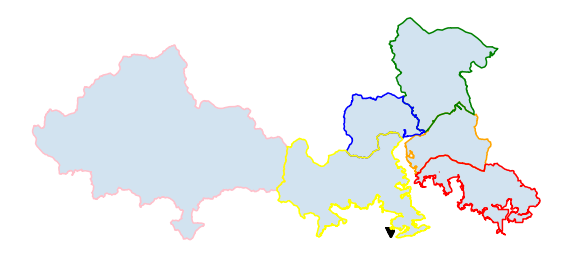

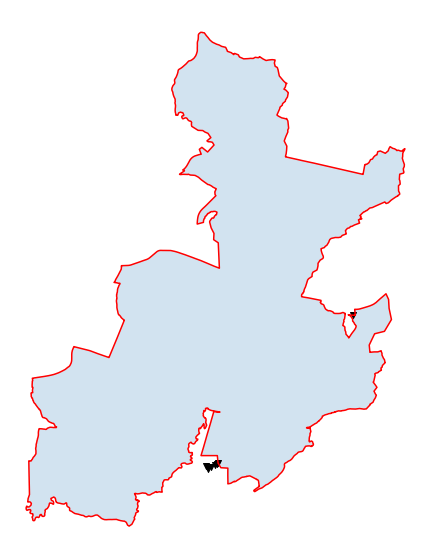

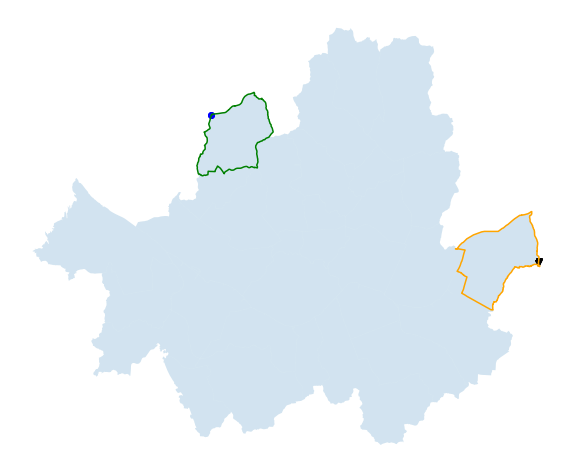

In [164]:
# 시각화를 거처 주소를 기준으로 관할 경찰서에 배정

d9['city'] = None
a = d9.index[(d9['address'].str.contains('창원')==True) & (d9.police.isnull()==True)].to_list()
d9.loc[a, 'city'] = '창원'
b = d9.index[(d9['address'].str.contains('수원')==True) & (d9.police.isnull()==True)].to_list()
d9.loc[b, 'city'] = '수원'
c = d9.index[(d9['address'].str.contains('서울')==True) & (d9.police.isnull()==True)].to_list()
d9.loc[c, 'city'] = '서울'
d = d9.index[(d9['address'].str.contains('진관')==True) & (d9.police.isnull()==True)].to_list() # 주소지에 시가 쓰여있지 않으므로 '내곡'으로 표현
d9.loc[d, 'city'] = '진관'

import matplotlib.pyplot as plt

# 창원

ax = df.loc[df['PNAME']=='경남청'].plot(figsize=(10,10), alpha=0.2)
df[df['NAME']=='창원중부경찰서']['geometry'].boundary.plot(ax=ax, color='orange')
df[df['NAME']=='창원서부경찰서']['geometry'].boundary.plot(ax=ax, color='green')
df[df['NAME']=='진주경찰서']['geometry'].boundary.plot(ax=ax, color='pink')
df[df['NAME']=='진해경찰서']['geometry'].boundary.plot(ax=ax, color='red')
df[df['NAME']=='마산동부경찰서']['geometry'].boundary.plot(ax=ax, color='blue')
df[df['NAME']=='마산중부경찰서']['geometry'].boundary.plot(ax=ax, color='yellow')
d9.loc[d9['city']=='창원','geometry'].plot(ax=ax, marker='v', color='black')

ax.set_axis_off()
plt.show()
# 창원으로 표시된 부분은 마산중부경찰서로 넣기로함

# 수원

ax = df.loc[df['NAME']=='수원남부경찰서'].plot(figsize=(10,10), alpha=0.2)
df[df['NAME']=='수원남부경찰서']['geometry'].boundary.plot(ax=ax,color='red')
#df[df['NAME']=='수원서부경찰서']['geometry'].boundary.plot(ax=ax, color='orange')
#df[df['NAME']=='수원중부경찰서']['geometry'].boundary.plot(ax=ax, color='green')
d9.loc[d9['city']=='수원','geometry'].plot(ax=ax, marker='v', color='black')

ax.set_axis_off()
plt.show()
# 수원남부경찰서로 모두 편입시키기로 결정

# 서울

ax = df.loc[df['PNAME']=='서울청'].plot(figsize=(10,10), alpha=0.2)
df[df['NAME']=='서울강동경찰서']['geometry'].boundary.plot(ax=ax, color='orange')
df[df['NAME']=='서울은평경찰서']['geometry'].boundary.plot(ax=ax, color='green')
d9.loc[d9['city']=='서울','geometry'].plot(ax=ax, marker='v', color='black')
d9.loc[d9['city']=='진관', 'geometry'].plot(ax=ax, marker='o', color='blue')

ax.set_axis_off()
plt.show()
# 서울로 표기된 부분은 강동으로 진관은 은평으로 넣기로

In [165]:
# 처리 전후로 값을 출력해 잘 배정되었는지 확인
# 마산처리
print('마산 전', len(d9[d9['police']=='마산중부경찰서']))
chang_index = d9.index[d9['city']=='창원'].to_list()
d9.loc[chang_index,'police'] = '마산중부경찰서'
print('마산 후', len(d9[d9['police']=='마산중부경찰서']))

# 수원 처리
print('수원 전', len(d9[d9['police']=='수원남부경찰서']))
suwon_index = d9.index[d9['city']=='수원'].to_list()
d9.loc[suwon_index,'police'] = '수원남부경찰서'
print('수원 후', len(d9[d9['police']=='수원남부경찰서']))
      
# 서울 처리
print("강동 전 ", len(d9[d9['police']=='서울강동경찰서']))
gang_index = d9.index[d9['city']=='서울'].to_list()
d9.loc[gang_index,'police'] = '서울강동경찰서'
print("강동 후", len(d9[d9['police']=='서울강동경찰서']))

print("은평 전 ", len(d9[d9['police']=='서울은평경찰서']))
gang_index = d9.index[d9['city']=='진관'].to_list()
d9.loc[gang_index,'police'] = '서울은평경찰서'
print("은평 후", len(d9[d9['police']=='서울은평경찰서']))

마산 전 6712
마산 후 6734
수원 전 3452
수원 후 3459
강동 전  7500
강동 후 7505
은평 전  3840
은평 후 3842


In [166]:
# 위에서 생성했던 송파, 양천, 동대문 데이터와 이어붙이기
d9 = d9.drop('city', axis=1)
d9 = d9.append(data, ignore_index=True)
d9.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 256061 entries, 0 to 256060
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   year      256061 non-null  float64 
 1   address   245082 non-null  object  
 2   lon       229405 non-null  float64 
 3   lat       229405 non-null  float64 
 4   geometry  229405 non-null  geometry
 5   police    256061 non-null  object  
dtypes: float64(3), geometry(1), object(2)
memory usage: 11.7+ MB


In [167]:
# 년도별 보안등 갯수 카운팅
a = d9[d9['year']<2018].groupby('police').count().year.index.to_list()
b = d9[d9['year']<2018].groupby('police').count().year.values
c = d9[d9['year']<2019].groupby('police').count().year.values
d = d9[d9['year']<2020].groupby('police').count().year.values
e = d9[d9['year']<2021].groupby('police').count().year.values

result = pd.DataFrame()
result['name'] = a
result['2017'] = b
result['2018'] = c
result['2019'] = d
result['2020'] = e
result

,name,2017,2018,2019,2020
0,마산동부경찰서,5562,5562,5562,5562
1,마산중부경찰서,6734,6734,6734,6734
2,서울강남경찰서,5028,5028,5028,5028
3,서울강동경찰서,7505,7505,7505,7505
4,서울강북경찰서,8177,8177,8177,8177
5,서울강서경찰서,8556,8556,8556,8556
6,서울관악경찰서,11882,11882,11882,11882
7,서울광진경찰서,9132,9132,9132,9132
8,서울구로경찰서,5947,6461,6801,7725
9,서울금천경찰서,5950,5981,6001,6002


In [168]:
# X셋에 사용할 형태로 변환
b = pd.DataFrame()
for i in range(0,len(result)) :
    a = pd.DataFrame(result.iloc[i,:][1:])
    a.columns = ['light']
    b = b.append(a, ignore_index=True)

def expand_grid(dictionary):
   return pd.DataFrame([row for row in product(*dictionary.values())], 
                       columns=dictionary.keys())

dictionary = {'name': result.name.unique(),'year': [2017, 2018, 2019, 2020]}
n_result = expand_grid(dictionary)
n_result = n_result.reindex(columns = ['year', 'name'])

n_result = n_result.join(b)

n_result

,year,name,light
0,2017,마산동부경찰서,5562
1,2018,마산동부경찰서,5562
2,2019,마산동부경찰서,5562
3,2020,마산동부경찰서,5562
4,2017,마산중부경찰서,6734
...,...,...,...
159,2020,창원서부경찰서,6078
160,2017,창원중부경찰서,2895
161,2018,창원중부경찰서,2895
162,2019,창원중부경찰서,2895


In [169]:
# 연도별 보안등 현황 내보내기
n_result.to_csv("5개시도_연도별_보안등.csv", index=False)

## 22번 데이터
#### 추가데이터 :
#### 서울특별시_도봉구_안전비상벨위치 데이터 : 공공데이터
(https://www.data.go.kr/tcs/dss/selectStdDataDetailView.do)

In [251]:
# 비상벨 변수
d22 = gpd.read_file("input/22.5개시도_비상벨현황.geojson")
d22.crs = {'init':'epsg:4326'}

# null값 존재하지 않음
print(d22.bell_set_yr.isnull().sum())

df= gpd.read_file('input/1.5개시도_경찰서_관할경계.geojson')
df.crs = {'init':'epsg:4326'}

d22.head()

/opt/app-root/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


0


,bell_us,bell_set_fac,bell_loc,bell_set_yr,geometry
0,기타,화장실,오가낭뜰 근린공원(간이),2017,MULTIPOINT (127.24880 36.51230)
1,기타,화장실,어진동음악분수,2017,MULTIPOINT (127.25660 36.50190)
2,기타,화장실,제천(간이),2017,MULTIPOINT (127.25660 36.50190)
3,기타,화장실,도시공원1(남리도시 공원화장실1),2017,MULTIPOINT (127.30260 36.59780)
4,기타,화장실,부강면 전통시장 화장실,2017,MULTIPOINT (127.36740 36.52950)


In [255]:
d22['police'] = None
for name in df['NAME'].unique() :
    a = df.loc[df['NAME']==name, 'geometry'].iloc[0]
    d22.loc[d22.within(a)==True, 'police'] = name
    
# 아예 누락된 경찰서을 확인
print(set(df.NAME.unique()).difference(d22.police.unique()))

# 값이 너무 적은 경찰서를 확인
print(len(d22.police == '서울강동경찰서'))

d22 = d22.drop('police', axis=1) # 우선 생성했던 police를 삭제

{'서울도봉경찰서'}
18334


In [249]:
# 누락된 도봉구 비상벨 정보는 외부 데이터를 이용해 보완
dobong = pd.read_csv("input/서울특별시_도봉구_안전비상벨위치_20190626.csv", sep=",", encoding = 'cp949')

# 기존의 데이터와 변수 순서와 이름을 맞춤
dobong = dobong.drop(['경비업체연계유무',
 '경찰연계유무',
 '관리기관명',
 '관리기관전화번호',
 '관리사무소연계유무',
 '데이터기준일자',
 '부가기능',
 '소재지도로명주소',
 '소재지지번주소',
 '안전비상벨관리번호',
 '연계방식',
 '최종점검결과구분',
 '최종점검일자'], axis=1)

dobong.columns=['bell_us', 'bell_set_fac', 'bell_loc','lat', 'lon', 'bell_set_yr']

# 위도와 경도를 활용해 geometry 변수를 생성
dobong["lon"] = dobong["lon"].astype(float)
dobong["lat"] = dobong["lat"].astype(float)
dobong["geometry"] = dobong.apply(lambda row : Point([row["lon"],row['lat']]), axis=1)
dobong = gpd.GeoDataFrame(dobong, geometry="geometry")
dobong.crs = {'init':'epsg:4326'}
                
dobong['police'] = '서울도봉경찰서'
dobong = dobong.reindex(columns=['bell_us', 'bell_set_fac', 'bell_loc', 'bell_set_yr', 'geometry', 'police'])
dobong

/opt/app-root/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,bell_us,bell_set_fac,bell_loc,bell_set_yr,geometry,police
0,1,5,도봉산3길 57 바다회갯벌,2010,POINT (127.04380 37.68473),서울도봉경찰서
1,1,5,도봉로187길 10 무지개공원 입구,2010,POINT (127.04528 37.68596),서울도봉경찰서
2,1,5,도봉로181길 29 해가온 앞,2010,POINT (127.04419 37.68411),서울도봉경찰서
3,1,5,도봉로180길 53 극동아파트상가 뿌리부동산 앞 전주,2010,POINT (127.04898 37.68254),서울도봉경찰서
4,1,5,도봉로181가길 29 미래마트 앞,2010,POINT (127.04519 37.68263),서울도봉경찰서
...,...,...,...,...,...,...
616,1,5,도봉동 582-11 (도봉로177길 19),2018,POINT (127.04453 37.68143),서울도봉경찰서
617,1,5,방학동 713-35 (방학로 54),2018,POINT (127.04634 37.66293),서울도봉경찰서
618,1,5,창동 743-24 (마들로 542),2018,POINT (127.05047 37.66004),서울도봉경찰서
619,1,5,방학동 724-2 (마들로 584),2018,POINT (127.04697 37.66221),서울도봉경찰서


In [250]:
 # 누락된 강동구 비상벨 정보는 외부 데이터를 이용해 보완
gangdong = pd.read_csv("input/서울특별시_강동구_CCTV_20200911_1600136294390_157488.csv", sep=",", encoding = 'cp949')

gangdong = gangdong.drop(['관리기관명', '소재지도로명주소','카메라대수', '카메라화소수', '촬영방면정보','보관일수','관리기관전화번호','데이터기준일자'], axis=1)
gangdong['bell_set_fac'] = None
gangdong.columns=['bell_loc', 'bell_us', 'bell_set_yr','lat', 'lon', 'bell_set_fac']
gangdong['bell_set_yr'] = gangdong['bell_set_yr'].apply(lambda x : str(x)[0:4])
gangdong['bell_set_yr'] = gangdong['bell_set_yr'].astype(float)

# 위도와 경도를 활용해 geometry 변수를 생성
gangdong["lon"] = gangdong["lon"].astype(float)
gangdong["lat"] = gangdong["lat"].astype(float)
gangdong["geometry"] = gangdong.apply(lambda row : Point([row["lon"],row['lat']]), axis=1)
gangdong = gpd.GeoDataFrame(gangdong, geometry="geometry")
gangdong.crs = {'init':'epsg:4326'}
                
gangdong['police'] = '서울강동경찰서'
gangdong = gangdong.reindex(columns=['bell_us', 'bell_set_fac', 'bell_loc', 'bell_set_yr', 'geometry', 'police'])

dobong = dobong.append(gangdong, ignore_index=True)

dobong

/opt/app-root/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,bell_us,bell_set_fac,bell_loc,bell_set_yr,geometry,police
0,1,5,도봉산3길 57 바다회갯벌,2010.0,POINT (127.04380 37.68473),서울도봉경찰서
1,1,5,도봉로187길 10 무지개공원 입구,2010.0,POINT (127.04528 37.68596),서울도봉경찰서
2,1,5,도봉로181길 29 해가온 앞,2010.0,POINT (127.04419 37.68411),서울도봉경찰서
3,1,5,도봉로180길 53 극동아파트상가 뿌리부동산 앞 전주,2010.0,POINT (127.04898 37.68254),서울도봉경찰서
4,1,5,도봉로181가길 29 미래마트 앞,2010.0,POINT (127.04519 37.68263),서울도봉경찰서
...,...,...,...,...,...,...
1491,생활방범,None,서울특별시 강동구 둔촌동 77-79,2011.0,POINT (127.14120 37.53057),서울강동경찰서
1492,생활방범,None,서울특별시 강동구 둔촌동 77-58,2015.0,POINT (127.14193 37.53041),서울강동경찰서
1493,생활방범,None,서울특별시 강동구 둔촌동 77-86,2013.0,POINT (127.14172 37.52973),서울강동경찰서
1494,생활방범,None,서울특별시 강동구 감일동 180,2006.0,POINT (127.14957 37.51618),서울강동경찰서


In [258]:
# police변수 재생성
d22['police'] = None
for name in df['NAME'].unique() :
    a = df.loc[df['NAME']==name, 'geometry'].iloc[0]
    d22.loc[d22.within(a)==True, 'police'] = name
    
# 위에서 생성한 도봉경찰서&강동경찰서 데이터셋과 합쳐줌
d22 = d22[d22.police != '서울강동경찰서']
d22 = d22.append(dobong)

# 년도별 비상벨 갯수 카운팅
a = d22[d22['bell_set_yr']<2021].groupby('police').count().sort_values('bell_set_yr').index.to_list()
b = d22[d22['bell_set_yr']<2018].groupby('police').count().sort_values('bell_set_yr').bell_set_yr
c = d22[d22['bell_set_yr']<2019].groupby('police').count().sort_values('bell_set_yr').bell_set_yr
d = d22[d22['bell_set_yr']<2020].groupby('police').count().sort_values('bell_set_yr').bell_set_yr
e = d22[d22['bell_set_yr']<2021].groupby('police').count().sort_values('bell_set_yr').bell_set_yr

b = b.reindex(index=a)
c = c.reindex(index=a)
d = d.reindex(index=a)
e = e.reindex(index=a)

result = pd.DataFrame()
result['police'] = a
result['b_2017'] = b.values
result['b_2018'] = c.values
result['b_2019'] = d.values
result['b_2020'] = e.values

result.loc[result['b_2017'].isnull()==True, 'b_2017']=result.loc[result['b_2018'].isnull()==True, 'b_2018']=result.loc[result['b_2019'].isnull()==True, 'b_2019']=result.loc[result['b_2020'].isnull()==True, 'b_2020']=0
result

,police,b_2017,b_2018,b_2019,b_2020
0,서울방배경찰서,1.0,2.0,4.0,4
1,서울동대문경찰서,2.0,2.0,4.0,4
2,서울서초경찰서,0.0,1.0,5.0,5
3,마산동부경찰서,11.0,11.0,11.0,11
4,창원서부경찰서,9.0,11.0,11.0,11
5,마산중부경찰서,12.0,13.0,13.0,14
6,서울강북경찰서,21.0,22.0,22.0,22
7,창원중부경찰서,21.0,21.0,21.0,28
8,진해경찰서,39.0,39.0,39.0,39
9,세종경찰서,39.0,39.0,39.0,39


In [259]:
# 송파경찰서는 2020년에만 집계가 이뤄져 값이 비정상적으로 비대칭이므로 2020년 값을 2017년에 일괄 적용
if '서울송파경찰서' in result.police.unique() :
    s = result[result['police']=='서울송파경찰서'].iloc[:,4].values[0]
    songpa = ['서울송파경찰서', s, s, s, s]
    result.loc[result.police=='서울송파경찰서',:] = songpa

result

,police,b_2017,b_2018,b_2019,b_2020
0,서울방배경찰서,1.0,2.0,4.0,4
1,서울동대문경찰서,2.0,2.0,4.0,4
2,서울서초경찰서,0.0,1.0,5.0,5
3,마산동부경찰서,11.0,11.0,11.0,11
4,창원서부경찰서,9.0,11.0,11.0,11
5,마산중부경찰서,12.0,13.0,13.0,14
6,서울강북경찰서,21.0,22.0,22.0,22
7,창원중부경찰서,21.0,21.0,21.0,28
8,진해경찰서,39.0,39.0,39.0,39
9,세종경찰서,39.0,39.0,39.0,39


In [260]:
# X셋에 사용할 형태로 변환
b = pd.DataFrame()
for i in range(0,len(result)) :
    a = pd.DataFrame(result.iloc[i,:][1:])
    a.columns = ['bell']
    b = b.append(a, ignore_index=True)

def expand_grid(dictionary):
   return pd.DataFrame([row for row in product(*dictionary.values())], 
                       columns=dictionary.keys())

dictionary = {'name': result.police.unique(),'year': [2017, 2018, 2019, 2020]}
n_result = expand_grid(dictionary)
n_result = n_result.reindex(columns = ['year', 'name'])

n_result = n_result.join(b)

n_result

,year,name,bell
0,2017,서울방배경찰서,1
1,2018,서울방배경찰서,2
2,2019,서울방배경찰서,4
3,2020,서울방배경찰서,4
4,2017,서울동대문경찰서,2
...,...,...,...
159,2020,서울광진경찰서,1519
160,2017,서울중랑경찰서,1584
161,2018,서울중랑경찰서,1682
162,2019,서울중랑경찰서,1778


In [261]:
# 연도별 비상벨 현황 내보내기
n_result.to_csv("5개시도_연도별_비상벨.csv", index=False)

## 10번 데이터
#### 추가데이터 :
#### 동대문_cctv설치 : 동대문 구청 제공 데이터
(http://www.ddm.go.kr/ddmmap/publicData/publicData.jsp?page=1&searchopt=&searchtxt=&cate_code=08&m=1)
#### 서울특별시_강동구_CCTV_20200911_1600136294390_157488.csv : 공공데이터
(https://www.data.go.kr/data/15013094/standard.do)
#### 도봉구_cctv.excel  : 도봉구청 디비디비맵 제공 데이터
(https://opendata.dobong.go.kr/dataset/datasetVw.asp?Code=147&vType=A)

In [176]:
# cctv변수 생성
d10 = pd.read_csv("input/10.5개시도_CCTV설치현황.csv")

# 설치 년월을 년도와 월을 구분
d10['year'] = d10.set_yr.apply(lambda x : str(x)[1:5])
d10.loc[d10['year']=='an','year']= None
d10["year"] = d10["year"].astype(float)

# null값을 최소값으로 대체
d10.loc[d10['year'].isnull()==True, 'year']= d10.year.min()

d10 = d10.drop(['set_yr'], axis=1)

d10["lon"] = d10["lon"].astype(float)
d10["lat"] = d10["lat"].astype(float)
d10["geometry"] = d10.apply(lambda row : Point([row["lon"],row['lat']]), axis=1)
d10 = gpd.GeoDataFrame(d10, geometry="geometry")
d10.crs = {'init':'epsg:4326'}

df= gpd.read_file('input/1.5개시도_경찰서_관할경계.geojson')
df.crs = {'init':'epsg:4326'}

d10.head()

/opt/app-root/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,address,purpose,cctv_cnt,lat,lon,year,geometry
0,세종특별자치시 조치원읍 교리 129-1,다목적,3,36.605059,127.296286,2001.0,POINT (127.29629 36.60506)
1,세종특별자치시 조치원읍 남리144,다목적,2,36.597678,127.302452,2001.0,POINT (127.30245 36.59768)
2,세종특별자치시 조치원읍 남리 425,다목적,3,36.594863,127.300492,2001.0,POINT (127.30049 36.59486)
3,세종특별자치시 조치원읍 명리82,다목적,3,36.600620,127.301301,2001.0,POINT (127.30130 36.60062)
4,세종특별자치시 조치원읍 상리18-10,다목적,4,36.602434,127.303145,2001.0,POINT (127.30315 36.60243)


In [177]:
d10['police'] = None
for name in df['NAME'].unique() :
    a = df.loc[df['NAME']==name, 'geometry'].iloc[0]
    d10.loc[d10.within(a)==True, 'police'] = name
    
# 아예 누락된 경찰서을 확인
print(set(df.NAME.unique()).difference(d10.police.unique()))

# 값이 현저히 적은 경찰서 확인
print(len(d10[d10.police=='서울동대문경찰서']))
print(len(d10[d10.police=='서울도봉경찰서']))

{'서울강동경찰서'}
9
10


In [178]:
# 누락된 강동 cctv 정보는 외부 데이터를 이용해 보완
gangdong = pd.read_csv("input/서울특별시_강동구_CCTV_20200911_1600136294390_157488.csv", sep=",", encoding = 'cp949')

gangdong = gangdong.drop(['관리기관명', '소재지도로명주소', '카메라화소수', '촬영방면정보', '보관일수', '관리기관전화번호', '데이터기준일자'], axis=1)

gangdong['year'] = gangdong['설치년월'].apply(lambda x : str(x)[0:4])
gangdong = gangdong.drop("설치년월", axis=1)

gangdong.loc[gangdong.year=='an', 'year'] = None

gangdong.year = gangdong.year.astype(float)
gangdong.columns=['address', 'purpose', 'cctv_cnt', 'lat', 'lon', 'year']
gangdong['police'] = '서울강동경찰서'

# 동대문 cctv 정보는 너무 적게 count되어 문제가 있다고 판단, 외부 데이터를 이용해 보완
dong = pd.read_csv("input/동대문_cctv설치.csv", encoding='cp949')

dong = dong.drop(['기준년도','관리기관명', '소재지도로명주소', '카메라화소수', '촬영방면정보', '보관일수', '관리기관전화번호', 'X', 'Y'], axis=1)
dong['lon'] = dong['lat'] = None
dong.columns=['address', 'purpose', 'cctv_cnt', 'year', 'lat', 'lon']
dong = dong.reindex(columns = ['address', 'purpose', 'cctv_cnt', 'lat', 'lon', 'year'])
dong['police'] = '서울동대문경찰서'
dongdong = gangdong.append(dong, ignore_index=True)

# 도봉 cctv 정보는 너무 적게 count되어 문제가 있다고 판단, 외부 데이터를 이용해 보완
dobong = pd.read_excel("input/도봉구_cctv.xlsx", header=7)

dobong = dobong.drop(['연번', '시설명', '동구분', '주소',  '전화번호', '관리기관명', '촬영방면정보', '보관일수'], axis=1)

dobong.columns=['lat', 'lon', 'address', 'purpose', 'cctv_cnt']
dobong = dobong.reindex(columns=['address', 'purpose', 'cctv_cnt', 'lat', 'lon', 'year'])
dobong['police'] = '서울도봉경찰서'

dongdong = dongdong.append(dobong, ignore_index=True)
dongdong.loc[dongdong.year.isnull()==True, 'year'] = gangdong.year.min() # 누락된 설치 년도는 최소값으로 처리

traffic = ['차량방범', '교통정보수집', '교통단속', '불법주정차', '체납차량단속', '그린파킹']
safety = ['다목적','어린이보호','생활방범', '공원안전', '어린이안전' , '방범']
etc = ['재난재해', '쓰레기단속', '기타', '시설물관리', '쓰레기무단투기', '재난안전']

dongdong.sp_purpose = dongdong.geometry = ''
dongdong.loc[dongdong['purpose'].apply(lambda x : x in traffic)==True, 'sp_purpose'] = '교통'
dongdong.loc[dongdong['purpose'].apply(lambda x : x in safety)==True, 'sp_purpose'] = '안전'
dongdong.loc[dongdong['purpose'].apply(lambda x : x in etc)==True, 'sp_purpose'] = '생활'

dongdong = dongdong.reindex(columns = ['address', 'purpose', 'cctv_cnt', 'lat', 'lon', 'year', 'geometry', 'sp_purpose', 'police'])
dongdong

,address,purpose,cctv_cnt,lat,lon,year,geometry,sp_purpose,police
0,서울특별시 강동구 길동 94,어린이보호,1,37.5408,127.147,2011.0,NaN,안전,서울강동경찰서
1,서울특별시 강동구 길동 82-4,어린이보호,1,37.5419,127.148,2014.0,NaN,안전,서울강동경찰서
2,서울특별시 강동구 성내동 449-7,생활방범,3,37.5224,127.134,2016.0,NaN,안전,서울강동경찰서
3,서울특별시 강동구 둔촌동 180-2,생활방범,4,37.5194,127.139,2016.0,NaN,안전,서울강동경찰서
4,서울특별시 강동구 성내동 459-6,생활방범,3,37.5272,127.122,2017.0,NaN,안전,서울강동경찰서
...,...,...,...,...,...,...,...,...,...
2803,NaN,교통단속,1,37.6492,127.046,2005.0,NaN,교통,서울도봉경찰서
2804,NaN,어린이안전,1,37.6455,127.05,2005.0,NaN,안전,서울도봉경찰서
2805,NaN,어린이안전,1,37.6607,127.049,2005.0,NaN,안전,서울도봉경찰서
2806,NaN,어린이안전,1,37.6583,127.046,2005.0,NaN,안전,서울도봉경찰서


In [179]:
# cctv 목적별 그룹명 변수 추가
traffic = ['차량방범', '교통정보수집', '교통단속', '불법주정차', '체납차량단속']
safety = ['다목적','어린이보호','생활방범' ]
etc = ['재난재해', '쓰레기단속', '기타', '시설물관리', '쓰레기무단투기']

d10.sp_purpose = ''
d10.loc[d10['purpose'].apply(lambda x : x in traffic)==True, 'sp_purpose'] = '교통'
d10.loc[d10['purpose'].apply(lambda x : x in safety)==True, 'sp_purpose'] = '안전'
d10.loc[d10['purpose'].apply(lambda x : x in etc)==True, 'sp_purpose'] = '생활'

d10 = d10[(d10.police != '서울동대문경찰서') & (d10.police != '서울도봉경찰서')] # 기존 데이터에서 동대문이 있을 경우 삭제
d10 = d10.append(dongdong, ignore_index=True) # 기존데이터에 강동구, 동대문 데이터를 더해줌

d10.head()

,address,purpose,cctv_cnt,lat,lon,year,geometry,police,sp_purpose
0,세종특별자치시 조치원읍 교리 129-1,다목적,3,36.6051,127.296,2001.0,POINT (127.29629 36.60506),세종경찰서,안전
1,세종특별자치시 조치원읍 남리144,다목적,2,36.5977,127.302,2001.0,POINT (127.30245 36.59768),세종경찰서,안전
2,세종특별자치시 조치원읍 남리 425,다목적,3,36.5949,127.3,2001.0,POINT (127.30049 36.59486),세종경찰서,안전
3,세종특별자치시 조치원읍 명리82,다목적,3,36.6006,127.301,2001.0,POINT (127.30130 36.60062),세종경찰서,안전
4,세종특별자치시 조치원읍 상리18-10,다목적,4,36.6024,127.303,2001.0,POINT (127.30315 36.60243),세종경찰서,안전


In [180]:
d10.loc[d10.police.isnull()==True]

,address,purpose,cctv_cnt,lat,lon,year,geometry,police,sp_purpose
4759,경상남도 창원시 마산합포구 구산면 구복리 산153-1,기타,2,35.059,128.564,2001.0,POINT (128.56389 35.05901),None,생활
15035,내곡동 (신원동) 69-7,생활방범,1,37.4305,127.071,2015.0,POINT (127.07116 37.43053),None,안전
35797,경기도 수원시 영통구 원천동 601-3,생활방범,1,37.2699,127.066,2012.0,POINT (127.06583 37.26985),None,안전
35798,경기도 수원시 영통구 원천동 601-9,생활방범,1,37.2693,127.068,2012.0,POINT (127.06796 37.26929),None,안전
38008,경기도 수원시 영통구 망포동 672-6,생활방범,4,37.2341,127.046,2019.0,POINT (127.04579 37.23415),None,안전
38159,경기도 수원시 영통구 망포동 234-3,교통정보수집,2,37.2347,127.046,2001.0,POINT (127.04575 37.23474),None,교통


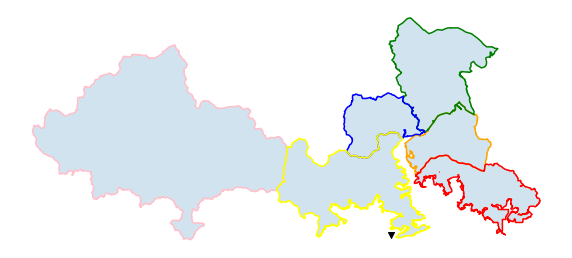

/opt/app-root/lib/python3.6/site-packages/geopandas/plotting.py:402: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


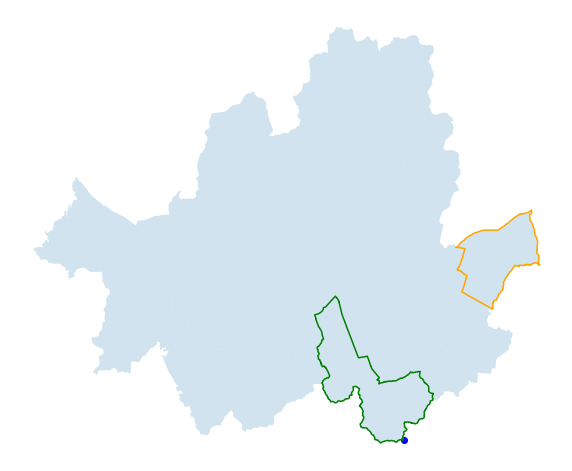

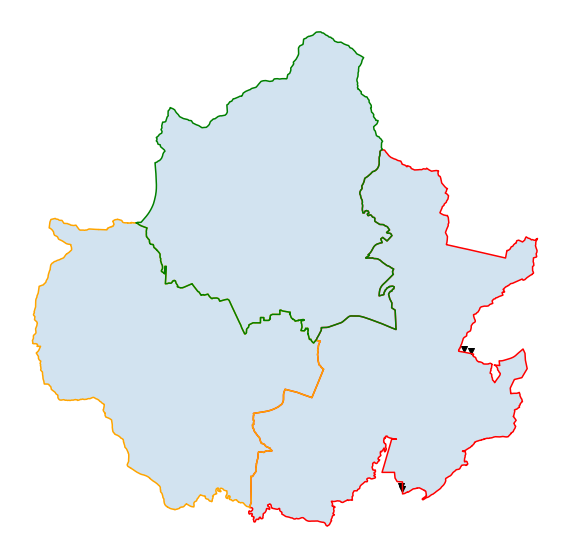

In [181]:
# 시각화를 거처 주소를 기준으로 관할 경찰서에 배정
d10['city'] = None
a = d10.index[(d10['address'].str.contains('창원')==True) & (d10.police.isnull()==True)].to_list()
d10.loc[a, 'city'] = '창원'
b = d10.index[(d10['address'].str.contains('수원')==True) & (d10.police.isnull()==True)].to_list()
d10.loc[b, 'city'] = '수원'
c = d10.index[(d10['address'].str.contains('서울')==True) & (d10.police.isnull()==True)].to_list()
d10.loc[c, 'city'] = '서울'
d = d10.index[(d10['address'].str.contains('내곡')==True) & (d10.police.isnull()==True)].to_list() # 주소지에 시가 쓰여있지 않으므로 '내곡'으로 표현
d10.loc[d, 'city'] = '내곡'

import matplotlib.pyplot as plt

# 창원

ax = df.loc[df['PNAME']=='경남청'].plot(figsize=(10,10), alpha=0.2)
df[df['NAME']=='창원중부경찰서']['geometry'].boundary.plot(ax=ax, color='orange')
df[df['NAME']=='창원서부경찰서']['geometry'].boundary.plot(ax=ax, color='green')
df[df['NAME']=='진주경찰서']['geometry'].boundary.plot(ax=ax, color='pink')
df[df['NAME']=='진해경찰서']['geometry'].boundary.plot(ax=ax, color='red')
df[df['NAME']=='마산동부경찰서']['geometry'].boundary.plot(ax=ax, color='blue')
df[df['NAME']=='마산중부경찰서']['geometry'].boundary.plot(ax=ax, color='yellow')
d10.loc[d10['city']=='창원','geometry'].plot(ax=ax, marker='v', color='black')

ax.set_axis_off()
plt.show()
# 창원으로 표시된 부분은 마산중부경찰서로 넣기로함

# 서울
ax = df.loc[df['PNAME']=='서울청'].plot(figsize=(10,10), alpha=0.2)
df[df['NAME']=='서울강동경찰서']['geometry'].boundary.plot(ax=ax, color='orange')
df[df['NAME']=='서울서초경찰서']['geometry'].boundary.plot(ax=ax, color='green')
d10.loc[d10['city']=='서울','geometry'].plot(ax=ax, marker='v', color='black')
d10.loc[d10['city']=='내곡', 'geometry'].plot(ax=ax, marker='o', color='blue')

ax.set_axis_off()
plt.show()
# 서울로 표기된 부분은 강동으로 내곡은 서초로 넣기로

# 수원
ax = df.loc[df['PNAME']=='경기남부청'].plot(figsize=(10,10), alpha=0.2)
df[df['NAME']=='수원남부경찰서']['geometry'].boundary.plot(ax=ax,color='red')
df[df['NAME']=='수원서부경찰서']['geometry'].boundary.plot(ax=ax, color='orange')
df[df['NAME']=='수원중부경찰서']['geometry'].boundary.plot(ax=ax, color='green')
d10.loc[d10['city']=='수원','geometry'].plot(ax=ax, marker='v', color='black')

ax.set_axis_off()
plt.show()
# 수원남부경찰서로 모두 편입시키기로 결정

In [182]:
# 처리 전후로 값을 출력해 잘 배정되었는지 확인
print('창원 전:',len(d10[d10['police']=='마산중부경찰서']))
idx = d10.index[d10['city']=='창원'].to_list()
d10.loc[idx,'police'] = '마산중부경찰서'
print('창원 후:',len(d10[d10['police']=='마산중부경찰서']))

print('강동 전:',len(d10[d10['police']=='서울강동경찰서']))
idx = d10.index[d10['city']=='서울'].to_list()
d10.loc[idx,'police'] = '서울강동경찰서'
print('강동 후:',len(d10[d10['police']=='서울강동경찰서']))

print('서초 전:',len(d10[d10['police']=='서울서초경찰서']))
idx = d10.index[d10['city']=='내곡'].to_list()
d10.loc[idx,'police'] = '서울서초경찰서'
print('서초 후:',len(d10[d10['police']=='서울서초경찰서']))

print('수원 전:',len(d10[d10['police']=='수원남부경찰서']))
idx = d10.index[d10['city']=='수원'].to_list()
d10.loc[idx,'police'] = '수원남부경찰서'
print('수원 후:',len(d10[d10['police']=='수원남부경찰서']))

창원 전: 424
창원 후: 425
강동 전: 875
강동 후: 875
서초 전: 2015
서초 후: 2016
수원 전: 1588
수원 후: 1592


In [183]:
# 전체 cctv 개수
a = d10[d10['year']<2021].groupby('police').count().sort_values('year').index.to_list()

b = d10[d10['year']<2018].groupby('police').count().sort_values('year').year
c = d10[d10['year']<2019].groupby('police').count().sort_values('year').year
d = d10[d10['year']<2020].groupby('police').count().sort_values('year').year
e = d10[d10['year']<2021].groupby('police').count().sort_values('year').year

b = b.reindex(index=a)
c = c.reindex(index=a)
d = d.reindex(index=a)
e = e.reindex(index=a)

result = pd.DataFrame()
result['police'] = a
result['c_2017'] = b.values
result['c_2018'] = c.values
result['c_2019'] = d.values
result['c_2020'] = e.values

# 교통 관련 cctv 개수
traf = d10[d10['sp_purpose']=='교통']

a = traf[(traf['year']<2021)&(traf['sp_purpose']=='교통')].groupby('police').count().sort_values('year').index.to_list()
b = traf[(traf['year']<2018)&(traf['sp_purpose']=='교통')].groupby('police').count().sort_values('year').year
c = traf[(traf['year']<2019)&(traf['sp_purpose']=='교통')].groupby('police').count().sort_values('year').year
d = traf[(traf['year']<2020)&(traf['sp_purpose']=='교통')].groupby('police').count().sort_values('year').year
e = traf[(traf['year']<2021)&(traf['sp_purpose']=='교통')].groupby('police').count().sort_values('year').year

b = b.reindex(index=a)
c = c.reindex(index=a)
d = d.reindex(index=a)
e = e.reindex(index=a)

result_traffic = pd.DataFrame()
result_traffic['police'] = a
result_traffic['tc_2017'] = b.values
result_traffic['tc_2018'] = c.values
result_traffic['tc_2019'] = d.values
result_traffic['tc_2020'] = e.values

result_traffic.loc[result_traffic.tc_2017.isnull()==True, 'tc_2017'] = 0
result_traffic.loc[result_traffic.tc_2018.isnull()==True, 'tc_2018'] = 0
result_traffic.loc[result_traffic.tc_2019.isnull()==True, 'tc_2019'] = 0
result_traffic.loc[result_traffic.tc_2020.isnull()==True, 'tc_2020'] = 0

# 안전 관련 cctv 개수
safe = d10[d10['sp_purpose']=='안전']

a = safe[(safe['year']<2021)&(safe['sp_purpose']=='안전')].groupby('police').count().sort_values('year').index.to_list()
b = safe[(safe['year']<2018)&(safe['sp_purpose']=='안전')].groupby('police').count().sort_values('year').year
c = safe[(safe['year']<2019)&(safe['sp_purpose']=='안전')].groupby('police').count().sort_values('year').year
d = safe[(safe['year']<2020)&(safe['sp_purpose']=='안전')].groupby('police').count().sort_values('year').year
e = safe[(safe['year']<2021)&(safe['sp_purpose']=='안전')].groupby('police').count().sort_values('year').year

b = b.reindex(index=a)
c = c.reindex(index=a)
d = d.reindex(index=a)
e = e.reindex(index=a)

result_safe = pd.DataFrame()
result_safe['police'] = a
result_safe['sc_2017'] = b.values
result_safe['sc_2018'] = c.values
result_safe['sc_2019'] = d.values
result_safe['sc_2020'] = e.values

result_safe.loc[result_safe.sc_2017.isnull()==True, 'sc_2017'] = 0
result_safe.loc[result_safe.sc_2018.isnull()==True, 'sc_2018'] = 0
result_safe.loc[result_safe.sc_2019.isnull()==True, 'sc_2019'] = 0
result_safe.loc[result_safe.sc_2020.isnull()==True, 'sc_2020'] = 0

# 생활 관련 cctv 개수
life = d10[d10['sp_purpose']=='생활']

a = life[(life['year']<2021)&(life['sp_purpose']=='생활')].groupby('police').count().sort_values('year').index.to_list()
b = life[(life['year']<2018)&(life['sp_purpose']=='생활')].groupby('police').count().sort_values('year').year
c = life[(life['year']<2019)&(life['sp_purpose']=='생활')].groupby('police').count().sort_values('year').year
d = life[(life['year']<2020)&(life['sp_purpose']=='생활')].groupby('police').count().sort_values('year').year
e = life[(life['year']<2021)&(life['sp_purpose']=='생활')].groupby('police').count().sort_values('year').year

b = b.reindex(index=a)
c = c.reindex(index=a)
d = d.reindex(index=a)
e = e.reindex(index=a)

result_life = pd.DataFrame()
result_life['police'] = a
result_life['lc_2017'] = b.values
result_life['lc_2018'] = c.values
result_life['lc_2019'] = d.values
result_life['lc_2020'] = e.values

result_life.loc[result_life.lc_2017.isnull()==True, 'lc_2017'] = 0
result_life.loc[result_life.lc_2018.isnull()==True, 'lc_2018'] = 0
result_life.loc[result_life.lc_2019.isnull()==True, 'lc_2019'] = 0
result_life.loc[result_life.lc_2020.isnull()==True, 'lc_2020'] = 0

In [184]:
# 송파 경찰서의 경우 2020에만 카운드 되고 나머지는 오류가 있다고 판단해 2020값을 2017~2019에 공통으로 사용
# 전반 수정
if '서울송파경찰서' in result.police.unique() :
    s = result[result['police']=='서울송파경찰서'].iloc[:,4].values[0]
    songpa = ['서울송파경찰서', s, s, s, s]
    result.loc[result.police=='서울송파경찰서',:] = songpa

# 교통 수정
if '서울송파경찰서' in result_traffic.police.unique() :
    s = result_traffic[result_traffic['police']=='서울송파경찰서'].iloc[:,4].values[0]
    songpa = ['서울송파경찰서', s, s, s, s]
    result_traffic.loc[result_traffic.police=='서울송파경찰서',:] = songpa

# 안전 수정
if '서울송파경찰서' in result_safe.police.unique() :
    s = result_safe[result_safe['police']=='서울송파경찰서'].iloc[:,4].values[0]
    songpa = ['서울송파경찰서', s, s, s, s]
    result_safe.loc[result_safe.police=='서울송파경찰서',:] = songpa

# 생활 수정
if '서울송파경찰서' in result_life.police.unique() :
    s = result_life[result_life['police']=='서울송파경찰서'].iloc[:,4].values[0]
    songpa = ['서울송파경찰서', s, s, s, s]
    result_life.loc[result_life.police=='서울송파경찰서',:] = songpa

In [185]:
import itertools
def expandgrid(*itrs):
   product = list(itertools.product(*itrs))
   return {'Var{}'.format(i+1):[x[i] for x in product] for i in range(len(itrs))}

result_traffic
a=[2017, 2018, 2019, 2020]
b=result['police'].unique()
ab=pd.DataFrame(expandgrid(a, b))
ab.columns=['year', 'name']
ab

,year,name
0,2017,서울남대문경찰서
1,2017,서울혜화경찰서
2,2017,서울종로경찰서
3,2017,마산중부경찰서
4,2017,창원서부경찰서
...,...,...
159,2020,서울송파경찰서
160,2020,서울강북경찰서
161,2020,서울마포경찰서
162,2020,서울광진경찰서


In [186]:
# 전체 cctv 
result=result.rename(columns={'police' :'name'})
result_2017=pd.merge(ab.loc[ab['year']==2017,], result[['name','c_2017']], how='left', on='name')
result_2017=result_2017.rename(columns={'c_2017':'cctv_sum'})

result_2018=pd.merge(ab.loc[ab['year']==2018,], result[['name','c_2018']], how='left', on='name')
result_2018=result_2018.rename(columns={'c_2018':'cctv_sum'})

result_2019=pd.merge(ab.loc[ab['year']==2019,], result[['name','c_2019']], how='left', on='name')
result_2019=result_2019.rename(columns={'c_2019':'cctv_sum'})

result_2020=pd.merge(ab.loc[ab['year']==2020,], result[['name','c_2020']], how='left', on='name')
result_2020=result_2020.rename(columns={'c_2020':'cctv_sum'})

result_fin=pd.concat([result_2017, result_2018, result_2019, result_2020])

# 교통 관련 cctv
result_traffic=result_traffic.rename(columns={'police' :'name'})
result_traffic_2017=pd.merge(ab.loc[ab['year']==2017,], result_traffic[['name','tc_2017']], how='left', on='name')
result_traffic_2017=result_traffic_2017.rename(columns={'tc_2017':'cctv_traffic'})

result_traffic_2018=pd.merge(ab.loc[ab['year']==2018,], result_traffic[['name','tc_2018']], how='left', on='name')
result_traffic_2018=result_traffic_2018.rename(columns={'tc_2018':'cctv_traffic'})

result_traffic_2019=pd.merge(ab.loc[ab['year']==2019,], result_traffic[['name','tc_2019']], how='left', on='name')
result_traffic_2019=result_traffic_2019.rename(columns={'tc_2019':'cctv_traffic'})

result_traffic_2020=pd.merge(ab.loc[ab['year']==2020,], result_traffic[['name','tc_2020']], how='left', on='name')
result_traffic_2020=result_traffic_2020.rename(columns={'tc_2020':'cctv_traffic'})

result_traffic_fin=pd.concat([result_traffic_2017, result_traffic_2018, result_traffic_2019, result_traffic_2020])

# 안전 관련 cctv
result_safe=result_safe.rename(columns={'police' :'name'})
result_safe_2017=pd.merge(ab.loc[ab['year']==2017,], result_safe[['name','sc_2017']], how='left', on='name')
result_safe_2017=result_safe_2017.rename(columns={'sc_2017':'cctv_safe'})

result_safe_2018=pd.merge(ab.loc[ab['year']==2018,], result_safe[['name','sc_2018']], how='left', on='name')
result_safe_2018=result_safe_2018.rename(columns={'sc_2018':'cctv_safe'})

result_safe_2019=pd.merge(ab.loc[ab['year']==2019,], result_safe[['name','sc_2019']], how='left', on='name')
result_safe_2019=result_safe_2019.rename(columns={'sc_2019':'cctv_safe'})

result_safe_2020=pd.merge(ab.loc[ab['year']==2020,], result_safe[['name','sc_2020']], how='left', on='name')
result_safe_2020=result_safe_2020.rename(columns={'sc_2020':'cctv_safe'})

result_safe_fin=pd.concat([result_safe_2017, result_safe_2018, result_safe_2019, result_safe_2020])

# 생활 관련 cctv
result_life=result_life.rename(columns={'police' :'name'})
result_life

result_life_2017=pd.merge(ab.loc[ab['year']==2017,], result_life[['name','lc_2017']], how='left', on='name')
result_life_2017=result_life_2017.rename(columns={'lc_2017':'cctv_life'})

result_life_2018=pd.merge(ab.loc[ab['year']==2018,], result_life[['name','lc_2018']], how='left', on='name')
result_life_2018=result_life_2018.rename(columns={'lc_2018':'cctv_life'})

result_life_2019=pd.merge(ab.loc[ab['year']==2019,], result_life[['name','lc_2019']], how='left', on='name')
result_life_2019=result_life_2019.rename(columns={'lc_2019':'cctv_life'})

result_life_2020=pd.merge(ab.loc[ab['year']==2020,], result_life[['name','lc_2020']], how='left', on='name')
result_life_2020=result_life_2020.rename(columns={'lc_2020':'cctv_life'})

result_life_fin=pd.concat([result_life_2017, result_life_2018, result_life_2019, result_life_2020])

# null값들은 0으로 처리
result_fin=result_fin.fillna(0)
result_traffic_fin=result_traffic_fin.fillna(0)
result_safe_fin=result_safe_fin.fillna(0)
result_life_fin=result_life_fin.fillna(0)

In [187]:
# cctv관련 데이터 내보내기
result_fin.to_csv("5개시도 cctv_전반.csv", index=False)
result_traffic_fin.to_csv("5개시도 cctv_교통.csv", index=False)
result_safe_fin.to_csv("5개시도 cctv_안전.csv", index=False)
result_life_fin.to_csv("5개시도 cctv_생활.csv", index=False)

## 2번 데이터

In [291]:
# 경찰서별 치안센터의 평균 커버면적 변수(mean_area)
d2 = gpd.read_file("input/2.5개시도_치안안전센터_관할경계.geojson")
d2.crs = {'init':'epsg:4326'}
d2['area'] = d2.geometry.area

d2.head()

/opt/app-root/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  after removing the cwd from sys.path.


,NAME,PSNAME,geometry,area
0,삼계파출소,마산동부경찰서,"MULTIPOLYGON (((128.49829 35.27500, 128.49876 ...",0.004173
1,중리파출소,마산동부경찰서,"MULTIPOLYGON (((128.51822 35.24046, 128.51824 ...",0.001382
2,교방파출소,마산중부경찰서,"MULTIPOLYGON (((128.57035 35.21196, 128.57039 ...",0.000257
3,구산파출소,마산중부경찰서,"MULTIPOLYGON (((128.53721 35.13687, 128.53732 ...",0.004283
4,남성파출소,마산중부경찰서,"MULTIPOLYGON (((128.57486 35.20959, 128.57497 ...",0.000202


In [298]:
# 경철서관할 구역별 파출소 당 평균 커버 면적 (단위 km^2)
area = pd.DataFrame((d2.groupby('PSNAME').sum().area/d2.groupby('PSNAME').count().NAME)*10000)
area.reset_index(inplace=True)
area.columns=['name', 'mean_area']
area

,name,mean_area
0,마산동부경찰서,13.042206
1,마산중부경찰서,29.484712
2,서울강남경찰서,1.547075
3,서울강동경찰서,2.999349
4,서울강북경찰서,2.688406
5,서울강서경찰서,3.903192
6,서울관악경찰서,3.343274
7,서울광진경찰서,2.229341
8,서울구로경찰서,2.564119
9,서울금천경찰서,2.639844


In [190]:
import itertools
def expandgrid(*itrs):
   product = list(itertools.product(*itrs))
   return {'Var{}'.format(i+1):[x[i] for x in product] for i in range(len(itrs))}

a=[2017, 2018, 2019, 2020]
b=d2['PSNAME'].unique()
abc=pd.DataFrame(expandgrid(a, b))
abc.columns=['year', 'name']
abc

mean_area = pd.merge(abc, area, how='left', on='name')
mean_area

,year,name,mean_area
0,2017,마산동부경찰서,13.042206
1,2017,마산중부경찰서,29.484712
2,2017,진주경찰서,54.288825
3,2017,창원서부경찰서,32.466378
4,2017,창원중부경찰서,15.821369
...,...,...,...
159,2020,서울강동경찰서,2.999349
160,2020,서울중부경찰서,0.992005
161,2020,서울서부경찰서,2.157586
162,2020,서울동대문경찰서,1.332174


In [191]:
mean_area.to_csv("mean_area.csv", index=False)

# 6. 모든 변수를 합쳐 데이터 셋 생성

In [262]:
from functools import reduce

y_set=pd.read_csv("y_set_year.csv")
y_set.head()

,Unnamed: 0,year,name,tot_f_safety,dept_safety,crime_safety,rob_satety_q1,mur_safety_q2,ta_safety_q3,raw_odder_q4,overall_q5
0,0,2017,서울중부서,72.50,71.90,77.40,76.85,77.85,70.60,67.15,73.90
1,1,2017,서울종로서,71.60,71.05,79.95,79.05,80.85,69.50,62.80,73.00
2,2,2017,서울남대문서,69.25,68.90,76.95,76.35,77.50,68.95,60.15,70.15
3,3,2017,서울서대문서,72.45,71.95,78.95,78.05,79.80,68.75,67.55,73.60
4,4,2017,서울혜화서,72.55,71.65,79.30,78.30,80.30,69.90,65.10,74.75


In [263]:
y_set['name']=y_set['name'].apply(lambda x : str(x)[0:-1] + "경찰서")

In [264]:
y_set['name'].unique()

array(['서울중부경찰서', '서울종로경찰서', '서울남대문경찰서', '서울서대문경찰서', '서울혜화경찰서', '서울용산경찰서',
       '서울성북경찰서', '서울동대문경찰서', '서울마포경찰서', '서울영등포경찰서', '서울성동경찰서', '서울동작경찰서',
       '서울광진경찰서', '서울서부경찰서', '서울강북경찰서', '서울금천경찰서', '서울중랑경찰서', '서울강남경찰서',
       '서울관악경찰서', '서울강서경찰서', '서울강동경찰서', '서울종암경찰서', '서울구로경찰서', '서울서초경찰서',
       '서울양천경찰서', '서울송파경찰서', '서울노원경찰서', '서울방배경찰서', '서울은평경찰서', '서울도봉경찰서',
       '서울수서경찰서', '경기남부수원중부경찰서', '경기남부수원남부경찰서', '경기남부수원서부경찰서', '충남세종경찰서',
       '경남창원중부경찰서', '경남창원서부경찰서', '경남마산중부경찰서', '경남마산동부경찰서', '경남진주경찰서',
       '경남진해경찰서'], dtype=object)

In [265]:
y_set.loc[y_set['name']=='경기남부수원중부경찰서', 'name'] = y_set.loc[y_set['name']=='경기남부수원중부경찰서', 'name'].apply(lambda x : str(x)[4:])
y_set.loc[y_set['name']=='경기남부수원남부경찰서', 'name'] = y_set.loc[y_set['name']=='경기남부수원남부경찰서', 'name'].apply(lambda x : str(x)[4:])
y_set.loc[y_set['name']=='경기남부수원서부경찰서', 'name'] = y_set.loc[y_set['name']=='경기남부수원서부경찰서', 'name'].apply(lambda x : str(x)[4:])

y_set.loc[y_set['name']=='충남세종경찰서', 'name'] = y_set.loc[y_set['name']=='충남세종경찰서', 'name'].apply(lambda x : str(x)[2:])

y_set.loc[y_set['name']=='경남창원중부경찰서', 'name'] = y_set.loc[y_set['name']=='경남창원중부경찰서', 'name'].apply(lambda x : str(x)[2:])
y_set.loc[y_set['name']=='경남창원서부경찰서', 'name'] = y_set.loc[y_set['name']=='경남창원서부경찰서', 'name'].apply(lambda x : str(x)[2:])
y_set.loc[y_set['name']=='경남마산중부경찰서', 'name'] = y_set.loc[y_set['name']=='경남마산중부경찰서', 'name'].apply(lambda x : str(x)[2:])
y_set.loc[y_set['name']=='경남마산동부경찰서', 'name'] = y_set.loc[y_set['name']=='경남마산동부경찰서', 'name'].apply(lambda x : str(x)[2:])

y_set.loc[y_set['name']=='경남진주경찰서', 'name'] = y_set.loc[y_set['name']=='경남진주경찰서', 'name'].apply(lambda x : str(x)[2:])

y_set.loc[y_set['name']=='경남진해경찰서', 'name'] = y_set.loc[y_set['name']=='경남진해경찰서', 'name'].apply(lambda x : str(x)[2:])


In [266]:
popu=pd.read_csv("popu_final.csv")
popu.head()

,year,name,polis_num,popu_num,local_num,popu_male_num,popu_female_num,foreigner_num,vulner_popu_num,active_popu_num,single_person_hh_sum,single_person_hh_male,single_person_hh_female
0,2017,마산동부경찰서,185.0,202864.0,200094.0,101910.0,100954.0,2770.0,54363.0,148501.0,20165.0,9818.0,10347.0
1,2017,마산중부경찰서,142.0,178751.0,176168.0,89417.0,89334.0,2583.0,52125.0,126626.0,21519.0,10113.0,11406.0
2,2017,서울강남경찰서,421.0,261257.0,257429.5,125043.5,136213.5,3827.5,62775.5,198481.5,31387.0,13257.5,18129.5
3,2017,서울강동경찰서,393.0,423978.0,418091.0,209931.0,214047.0,5887.0,105248.0,318730.0,41050.0,20064.0,20986.0
4,2017,서울강북경찰서,347.0,313698.0,309255.0,152464.0,161234.0,4443.0,85316.0,228382.0,39082.0,17809.0,21273.0


In [267]:
popu['name'].unique()

array(['마산동부경찰서', '마산중부경찰서', '서울강남경찰서', '서울강동경찰서', '서울강북경찰서', '서울강서경찰서',
       '서울관악경찰서', '서울광진경찰서', '서울구로경찰서', '서울금천경찰서', '서울남대문경찰서', '서울노원경찰서',
       '서울도봉경찰서', '서울동대문경찰서', '서울동작경찰서', '서울마포경찰서', '서울방배경찰서', '서울서대문경찰서',
       '서울서부경찰서', '서울서초경찰서', '서울성동경찰서', '서울성북경찰서', '서울송파경찰서', '서울수서경찰서',
       '서울양천경찰서', '서울영등포경찰서', '서울용산경찰서', '서울은평경찰서', '서울종로경찰서', '서울종암경찰서',
       '서울중랑경찰서', '서울중부경찰서', '서울혜화경찰서', '세종경찰서', '수원남부경찰서', '수원서부경찰서',
       '수원중부경찰서', '진주경찰서', '진해경찰서', '창원서부경찰서', '창원중부경찰서'], dtype=object)

In [268]:
cctv_sum=pd.read_csv("5개시도 cctv_전반.csv")
cctv_sum.head()

,year,name,cctv_sum
0,2017,서울남대문경찰서,299
1,2017,서울혜화경찰서,352
2,2017,서울종로경찰서,359
3,2017,마산중부경찰서,234
4,2017,창원서부경찰서,301


In [269]:
cctv_traffic=pd.read_csv("5개시도 cctv_교통.csv")
cctv_traffic.head()

,year,name,cctv_traffic
0,2017,서울남대문경찰서,39.0
1,2017,서울혜화경찰서,50.0
2,2017,서울종로경찰서,63.0
3,2017,마산중부경찰서,48.0
4,2017,창원서부경찰서,56.0


In [270]:
cctv_safe=pd.read_csv("5개시도 cctv_안전.csv")
cctv_safe.head()

,year,name,cctv_safe
0,2017,서울남대문경찰서,209
1,2017,서울혜화경찰서,302
2,2017,서울종로경찰서,296
3,2017,마산중부경찰서,155
4,2017,창원서부경찰서,217


In [271]:
cctv_life=pd.read_csv("5개시도 cctv_생활.csv")
cctv_life.head()

,year,name,cctv_life
0,2017,서울남대문경찰서,51.0
1,2017,서울혜화경찰서,0.0
2,2017,서울종로경찰서,0.0
3,2017,마산중부경찰서,31.0
4,2017,창원서부경찰서,28.0


In [272]:
cctv=pd.concat([cctv_sum, cctv_traffic.iloc[:,-1], cctv_safe.iloc[:,-1], cctv_life.iloc[:,-1]], axis=1, join='outer')
cctv

,year,name,cctv_sum,cctv_traffic,cctv_safe,cctv_life
0,2017,서울남대문경찰서,299,39.0,209,51.0
1,2017,서울혜화경찰서,352,50.0,302,0.0
2,2017,서울종로경찰서,359,63.0,296,0.0
3,2017,마산중부경찰서,234,48.0,155,31.0
4,2017,창원서부경찰서,301,56.0,217,28.0
...,...,...,...,...,...,...
159,2020,서울송파경찰서,2093,198.0,1737,158.0
160,2020,서울강북경찰서,2293,93.0,2010,190.0
161,2020,서울마포경찰서,2315,122.0,2192,1.0
162,2020,서울광진경찰서,3552,162.0,3030,360.0


In [273]:
bell=pd.read_csv("5개시도_연도별_비상벨.csv")
bell.head()

,year,name,bell
0,2017,서울방배경찰서,1.0
1,2018,서울방배경찰서,2.0
2,2019,서울방배경찰서,4.0
3,2020,서울방배경찰서,4.0
4,2017,서울동대문경찰서,2.0


In [274]:
light=pd.read_csv("5개시도_연도별_보안등.csv")
light.head()

,year,name,light
0,2017,마산동부경찰서,5562
1,2018,마산동부경찰서,5562
2,2019,마산동부경찰서,5562
3,2020,마산동부경찰서,5562
4,2017,마산중부경찰서,6734


In [275]:
drink=pd.read_csv("5개시도_연도별_단란주점.csv")
drink.head()

,name,year,drink
0,마산동부경찰서,2017,330
1,마산동부경찰서,2018,331
2,마산동부경찰서,2019,333
3,마산동부경찰서,2020,335
4,마산중부경찰서,2017,466


In [276]:
traffic_accident=pd.read_csv("a11_final.csv")
traffic_accident.rename(columns={'jur_stn': 'name'}, inplace = True)
traffic_accident.head()

,year,name,acc_case_차대사람,acc_case_차대차,acc_case_차량단독
0,2018,마산동부경찰서,136.0,240.0,13.0
1,2019,마산동부경찰서,168.0,275.0,13.0
2,2020,마산동부경찰서,116.0,257.0,9.0
3,2018,마산중부경찰서,161.0,360.0,41.0
4,2019,마산중부경찰서,156.0,396.0,59.0


In [277]:
fire=pd.read_csv("a13_final.csv")
fire.rename(columns={'jur_stn': 'name'}, inplace = True)
fire.head()

,name,year,fire
0,마산동부경찰서,2017,84.559999
1,마산동부경찰서,2018,76.000000
2,마산동부경찰서,2019,85.000000
3,마산동부경찰서,2020,86.000000
4,마산중부경찰서,2017,117.664573


In [278]:
suicide_rate=pd.read_csv("a18_final.csv")
suicide_rate.rename(columns={'jur_stn': 'name'}, inplace = True)
suicide_rate.head()

,name,year,suicide
0,마산동부경찰서,2017,37.0
1,마산동부경찰서,2018,48.0
2,마산동부경찰서,2019,55.0
3,마산동부경찰서,2020,66.0
4,마산중부경찰서,2017,58.0


In [279]:
crime=pd.read_csv("a6_final.csv")
crime.rename(columns={'jur_stn': 'name'}, inplace = True)
crime.isnull().sum()

name                   0
year                   0
occur_theft            0
occur_violence         0
occur_burglar          0
occur_murder           0
occur_traffic          0
occur_misdemeanor      0
occur_assembly         0
occur_ad               0
occur_life             0
occur_sexualassault    0
occur_prostitution     0
occur_total            0
dtype: int64

In [280]:
crime_arrest=pd.read_csv("a7_final.csv")
crime_arrest.rename(columns={'jur_stn': 'name'}, inplace = True)
crime_arrest.head()

,name,year,arrest_theft,arrest_violence,arrest_burglar,arrest_murder,arrest_traffic,arrest_misdemeanor,arrest_assembly,arrest_ad,arrest_life,arrest_sexualassault,arrest_prostitution,arrest_total
0,마산동부경찰서,2017,428.0,59.0,2.0,2.0,1170.0,35.0,0.0,0.0,0.0,19.0,155.0,1870.0
1,마산동부경찰서,2018,440.0,69.0,1.0,3.0,1025.0,24.0,0.0,2.0,1.0,31.0,22.0,1618.0
2,마산동부경찰서,2019,429.0,71.0,4.0,6.0,1067.0,30.0,0.0,10.0,0.0,27.0,16.0,1660.0
3,마산동부경찰서,2020,441.0,81.0,3.0,7.0,922.0,19.0,0.0,12.0,1.0,39.0,0.0,1525.0
4,마산중부경찰서,2017,345.0,29.0,7.0,3.0,1056.0,20.0,0.0,0.0,0.0,12.0,17.0,1489.0


In [281]:
eduratio=pd.read_csv('eduratio.csv')
eduratio

,year,name,highedu,lowedu
0,2017,세종경찰서,0.452830,0.094561
1,2017,진주경찰서,0.351681,0.109318
2,2017,창원서부경찰서,0.301793,0.057208
3,2017,창원중부경찰서,0.362266,0.042559
4,2017,마산동부경찰서,0.251695,0.083052
...,...,...,...,...
159,2020,서울영등포경찰서,0.466994,0.067477
160,2020,서울도봉경찰서,0.341758,0.075829
161,2020,서울은평경찰서,0.364121,0.073804
162,2020,서울강북경찰서,0.273791,0.102602


In [282]:
mean_area=pd.read_csv("mean_area.csv")
mean_area

,year,name,mean_area
0,2017,마산동부경찰서,13.042206
1,2017,마산중부경찰서,29.484712
2,2017,진주경찰서,54.288825
3,2017,창원서부경찰서,32.466378
4,2017,창원중부경찰서,15.821369
...,...,...,...
159,2020,서울강동경찰서,2.999349
160,2020,서울중부경찰서,0.992005
161,2020,서울서부경찰서,2.157586
162,2020,서울동대문경찰서,1.332174


In [283]:
no_fire = [traffic_accident,fire, suicide_rate, crime, crime_arrest]
no_fire = reduce(lambda  left,right: pd.merge(left,right,on=['name', 'year'],
                                            how='outer'), no_fire)
no_fire

,year,name,acc_case_차대사람,acc_case_차대차,acc_case_차량단독,fire,suicide,occur_theft,occur_violence,occur_burglar,...,arrest_burglar,arrest_murder,arrest_traffic,arrest_misdemeanor,arrest_assembly,arrest_ad,arrest_life,arrest_sexualassault,arrest_prostitution,arrest_total
0,2018,마산동부경찰서,136.0,240.0,13.0,76.000000,48.000000,769.0,85.0,0.0,...,1.0,3.0,1025.0,24.0,0.0,2.0,1.0,31.0,22.0,1618.0
1,2019,마산동부경찰서,168.0,275.0,13.0,85.000000,55.000000,693.0,61.0,4.0,...,4.0,6.0,1067.0,30.0,0.0,10.0,0.0,27.0,16.0,1660.0
2,2020,마산동부경찰서,116.0,257.0,9.0,86.000000,66.000000,666.0,74.0,0.0,...,3.0,7.0,922.0,19.0,0.0,12.0,1.0,39.0,0.0,1525.0
3,2018,마산중부경찰서,161.0,360.0,41.0,105.000000,66.000000,517.0,40.0,4.0,...,3.0,12.0,1120.0,27.0,0.0,2.0,0.0,24.0,7.0,1642.0
4,2019,마산중부경찰서,156.0,396.0,59.0,129.000000,57.000000,381.0,34.0,1.0,...,2.0,6.0,1069.0,23.0,0.0,6.0,0.0,30.0,8.0,1480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,2017,수원중부경찰서,NaN,NaN,NaN,128.461787,86.666667,1569.0,192.0,8.0,...,7.0,5.0,2439.0,77.0,0.0,3.0,1.0,81.0,33.0,3732.0
160,2017,진주경찰서,NaN,NaN,NaN,264.000000,68.000000,1694.0,161.0,4.0,...,5.0,8.0,2207.0,14.0,1.0,0.0,0.0,70.0,44.0,3719.0
161,2017,진해경찰서,NaN,NaN,NaN,131.512060,34.000000,417.0,68.0,1.0,...,1.0,0.0,1184.0,16.0,0.0,1.0,1.0,29.0,40.0,1667.0
162,2017,창원서부경찰서,NaN,NaN,NaN,81.118185,32.000000,737.0,81.0,8.0,...,8.0,4.0,1549.0,15.0,0.0,0.0,2.0,46.0,18.0,2174.0


In [284]:
data = [y_set.drop(['Unnamed: 0'], axis = 1), popu, cctv, bell, light, drink, eduratio, no_fire,  mean_area]
data = reduce(lambda  left,right: pd.merge(left,right,on=['name', 'year'],
                                            how='outer'), data)
data

,year,name,tot_f_safety,dept_safety,crime_safety,rob_satety_q1,mur_safety_q2,ta_safety_q3,raw_odder_q4,overall_q5,...,arrest_murder,arrest_traffic,arrest_misdemeanor,arrest_assembly,arrest_ad,arrest_life,arrest_sexualassault,arrest_prostitution,arrest_total,mean_area
0,2017,서울중부경찰서,72.50,71.90,77.40,76.85,77.85,70.60,67.15,73.90,...,0.0,632.0,31.0,2.0,0.0,0.0,31.0,24.0,1280.0,0.992005
1,2017,서울종로경찰서,71.60,71.05,79.95,79.05,80.85,69.50,62.80,73.00,...,3.0,372.0,52.0,51.0,2.0,0.0,41.0,48.0,1022.0,1.477058
2,2017,서울남대문경찰서,69.25,68.90,76.95,76.35,77.50,68.95,60.15,70.15,...,0.0,412.0,12.0,14.0,0.0,0.0,31.0,18.0,951.0,0.454748
3,2017,서울서대문경찰서,72.45,71.95,78.95,78.05,79.80,68.75,67.55,73.60,...,4.0,608.0,49.0,1.0,0.0,0.0,62.0,66.0,1622.0,2.226084
4,2017,서울혜화경찰서,72.55,71.65,79.30,78.30,80.30,69.90,65.10,74.75,...,2.0,850.0,35.0,0.0,0.0,0.0,28.0,14.0,1292.0,0.663411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,2020,수원중부경찰서,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,3744.0,95.0,0.0,8.0,1.0,149.0,1.0,5518.0,5.941207
160,2020,진주경찰서,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1333.0,28.0,0.0,0.0,2.0,28.0,0.0,2359.0,54.288825
161,2020,진해경찰서,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,820.0,25.0,0.0,6.0,1.0,25.0,0.0,1130.0,20.498723
162,2020,창원서부경찰서,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1589.0,21.0,0.0,1.0,0.0,37.0,0.0,2291.0,32.466378


In [285]:
data = data.rename(columns = {'acc_case_차대사람':'acc_car_person', 'acc_case_차대차':'acc_car_car', 'acc_case_차량단독':'acc_car'})

In [286]:
data = data.rename(columns = {'occur_강간 및 강제추행':'occur_rape','occur_강도':'occur_robbery', 'occur_경범죄':'occur_misdemeanor', 'occur_미분류':'occur_extra', 'occur_사기':'occur_fraud', 'occur_살인':'occur_murder', 'occur_절도':'occur_theft',
                      'occur_침입':'occur_invasion', 'occur_폭력':'occur_violence', 'occur_환경':'occur_envir', 'occur_횡령':'occur_seizure', 'occur_교통':'occur_traffic'})

In [287]:
data = data.rename(columns = {'arrest_강간 및 강제추행':'arrest_rape','arrest_강도':'arrest_robbery', 'arrest_경범죄':'arrest_misdemeanor', 'arrest_미분류':'arrest_extra', 'arrest_사기':'arrest_fraud', 'arrest_살인':'arrest_murder', 'arrest_절도':'arrest_theft',
                      'arrest_침입':'arrest_invasion', 'arrest_폭력':'arrest_violence', 'arrest_환경':'arrest_envir', 'arrest_횡령':'arrest_seizure', 'arrest_교통':'arrest_traffic'})

In [288]:
data.isnull().sum()

year                        0
name                        0
tot_f_safety               41
dept_safety                41
crime_safety               41
 rob_satety_q1             41
mur_safety_q2              41
ta_safety_q3               41
raw_odder_q4               41
overall_q5                 41
polis_num                   0
popu_num                    0
local_num                   0
popu_male_num               0
popu_female_num             0
foreigner_num               0
vulner_popu_num             0
active_popu_num             0
single_person_hh_sum        0
single_person_hh_male       0
single_person_hh_female     0
cctv_sum                    0
cctv_traffic                0
cctv_safe                   0
cctv_life                   0
bell                        0
light                       0
drink                       0
highedu                     0
lowedu                      0
acc_car_person             41
acc_car_car                41
acc_car                    41
fire      

In [289]:
data.shape

(164, 60)

In [290]:
# 최종 전처리 데이터 내보내기
data.to_csv('data_final.csv',  index=False, encoding='utf-8') 